In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams
import statsmodels.tools.eval_measures as em

In [5]:
data_spark = pd.read_csv('C:/Users/Neeraj Arora/important files/Sparkling.csv')

In [6]:
data_spark.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [7]:
data_spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [8]:
data_rose= pd.read_csv('C:/Users/Neeraj Arora/important files/Rose.csv')

In [9]:
data_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [10]:
data_rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [11]:
date= pd.date_range(start= '1/1/1980', end= '8/1/1995', freq= 'M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
df= pd.DataFrame({'YearMonth':date, 'Sparkling':data_spark.Sparkling, 'Rose':data_rose.Rose})
df.set_index('YearMonth', inplace= True)

In [13]:
df.head()

Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sparkling  187 non-null    int64  
 1   Rose       185 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [15]:
df.describe()

Sparkling        Rose
count   187.000000  185.000000
mean   2402.417112   90.394595
std    1295.111540   39.175344
min    1070.000000   28.000000
25%    1605.000000   63.000000
50%    1874.000000   86.000000
75%    2549.000000  112.000000
max    7242.000000  267.000000

In [16]:
df.isnull().sum()

Sparkling    0
Rose         2
dtype: int64

Text(0, 0.5, 'Units Sold')

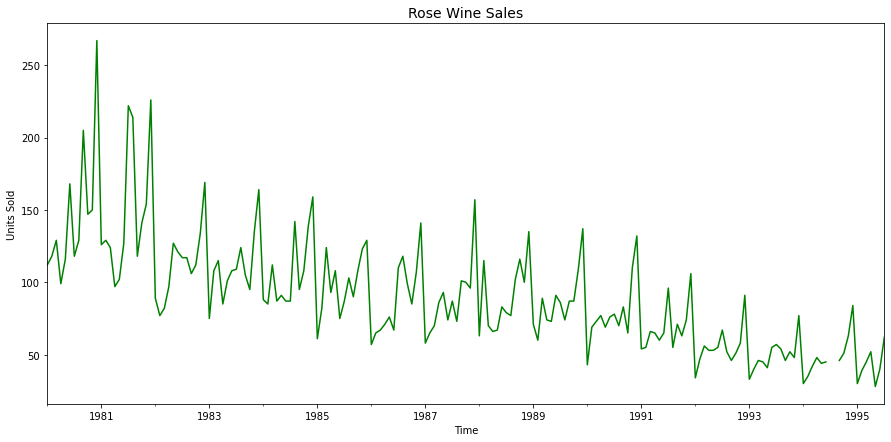

In [17]:
plt.figure(figsize = (15, 7))
df.Rose.plot(color='green')
plt.title('Rose Wine Sales', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Units Sold')

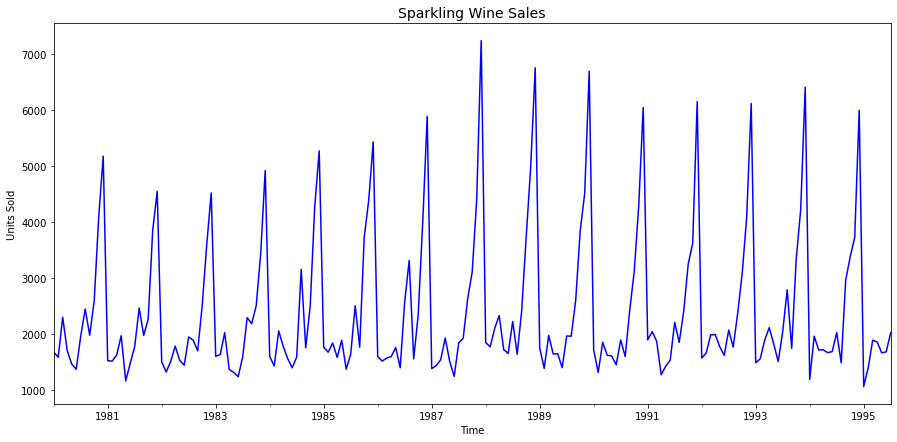

In [18]:
plt.figure(figsize = (15, 7))
df.Sparkling.plot(color='blue')
plt.title('Sparkling Wine Sales', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')


In [19]:
df['1994']

Sparkling  Rose
YearMonth                  
1994-01-31       1197  30.0
1994-02-28       1968  35.0
1994-03-31       1720  42.0
1994-04-30       1725  48.0
1994-05-31       1674  44.0
1994-06-30       1693  45.0
1994-07-31       2031   NaN
1994-08-31       1495   NaN
1994-09-30       2968  46.0
1994-10-31       3385  51.0
1994-11-30       3729  63.0
1994-12-31       5999  84.0

In [20]:
#Treatment of Missing Value
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

YearMonth
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] =  15,7

Text(0, 0.5, 'Units Sold')

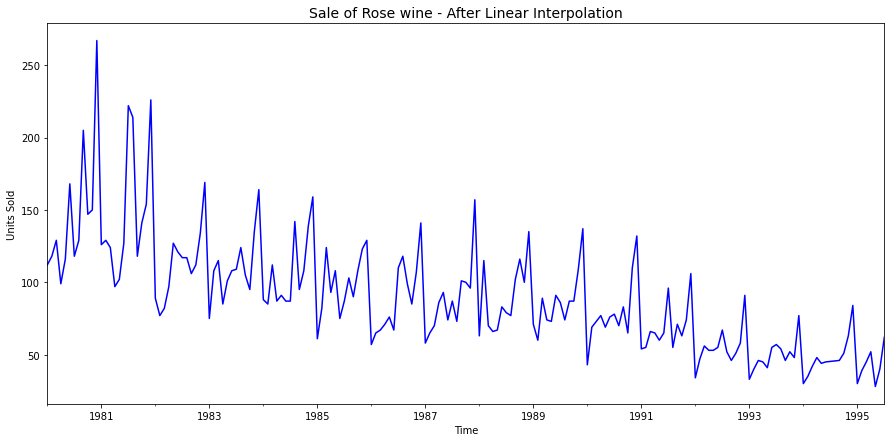

In [22]:
plt.figure(figsize = (15, 7))
df.Rose.plot(color='blue')
plt.title('Sale of Rose wine - After Linear Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

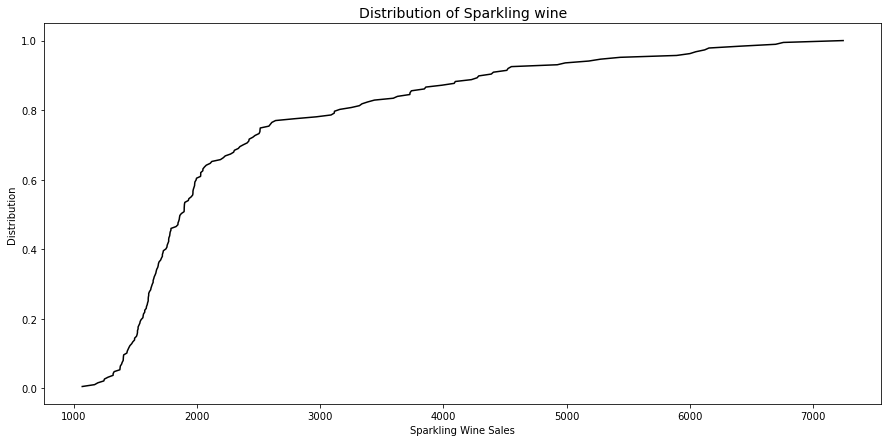

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (15, 7))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'BLACK')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sparkling Wine Sales')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

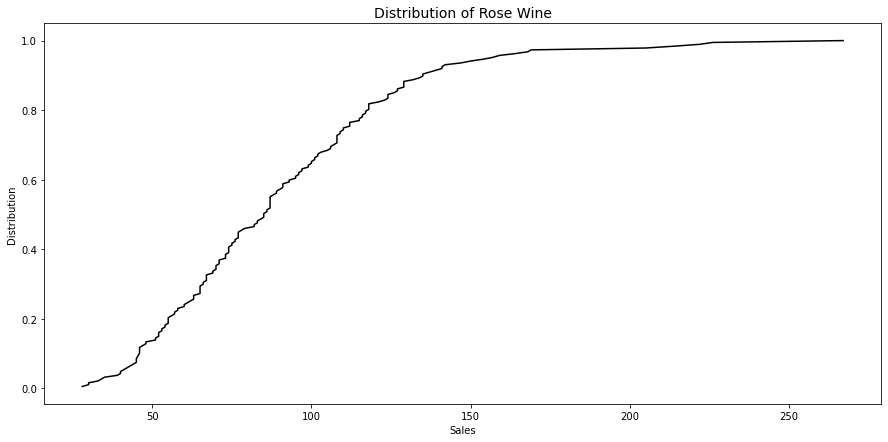

In [24]:
plt.figure(figsize = (15, 7))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'black')
plt.title('Distribution of Rose Wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

Text(0.5, 1.0, 'Sparkling Yearly Boxplot')

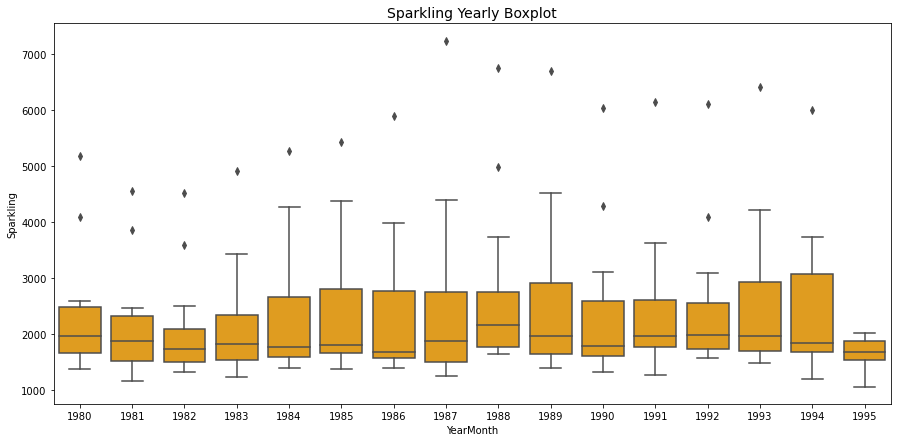

In [25]:
#Yearly Boxplot - Sparkling Wine
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'orange')
plt.title('Sparkling Yearly Boxplot', fontsize=14)

Text(0.5, 1.0, 'Sparkling Monthly Boxplot')

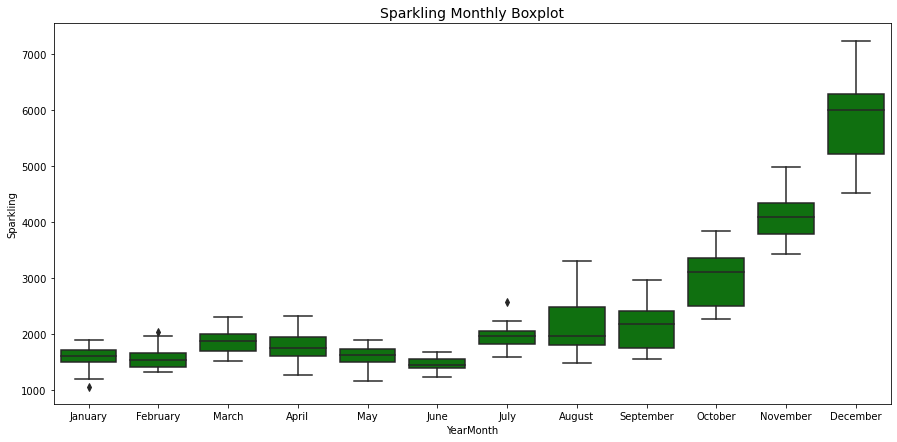

In [26]:
#Monthly Plot - Sparkling
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'green')
plt.title('Sparkling Monthly Boxplot', fontsize=14)

Text(0.5, 1.0, 'Rose Yearly Boxplot')

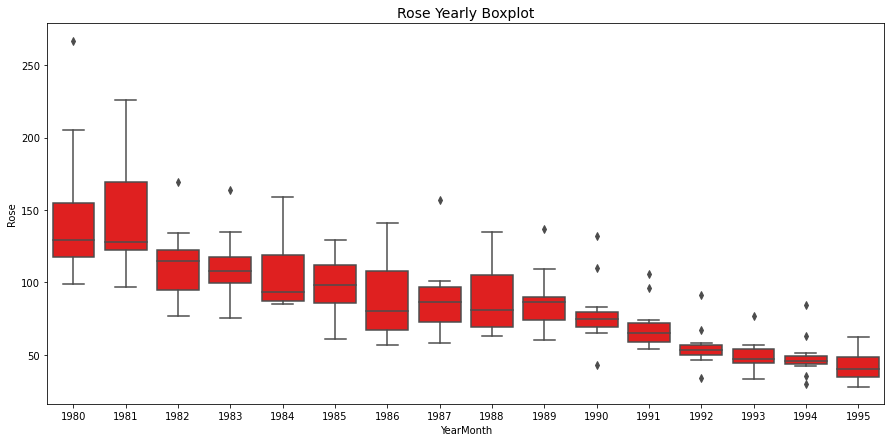

In [27]:
#Yearly Boxplot - Rose
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.year,y = df['Rose'], color='red')
plt.title('Rose Yearly Boxplot', fontsize=14)

Text(0.5, 1.0, 'Rose Monthly Boxplot')

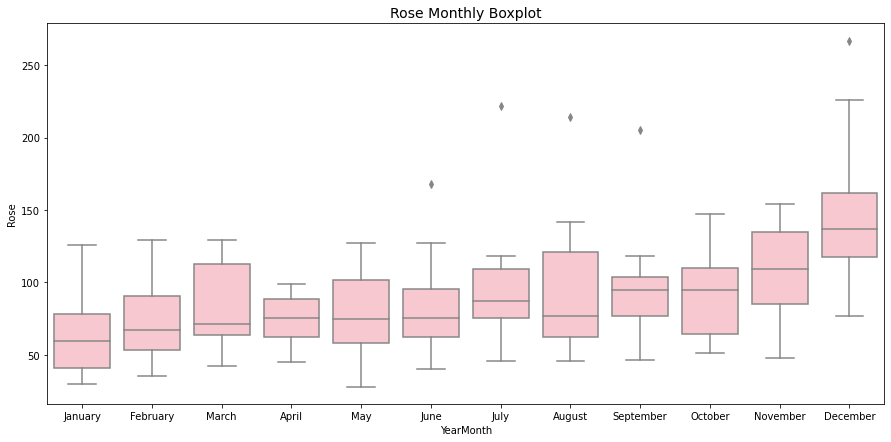

In [28]:
#Monthly Plot - Rose
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.index.month_name(),y = df['Rose'], color='pink')
plt.title('Rose Monthly Boxplot', fontsize=14)

Text(0.5, 1.0, 'Sparkling - Monthly plot')

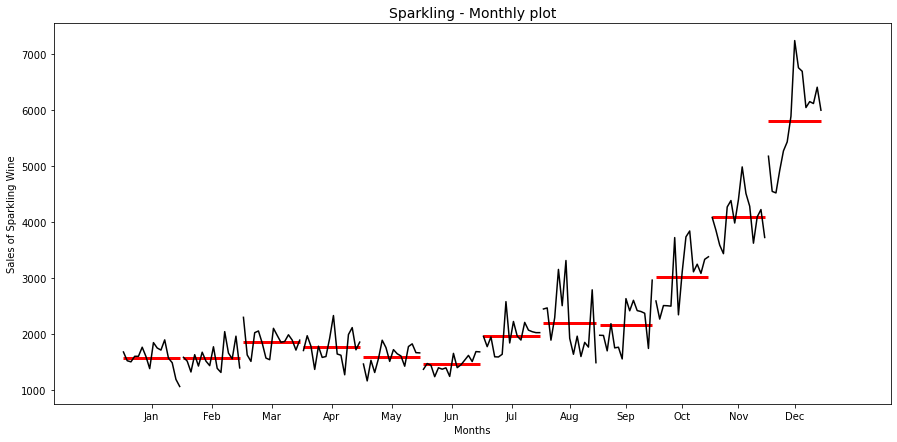

In [29]:
#For Rose Monthly and Yearly plot
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sales of Sparkling Wine')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

Text(0.5, 1.0, 'Rose - Monthly plot')

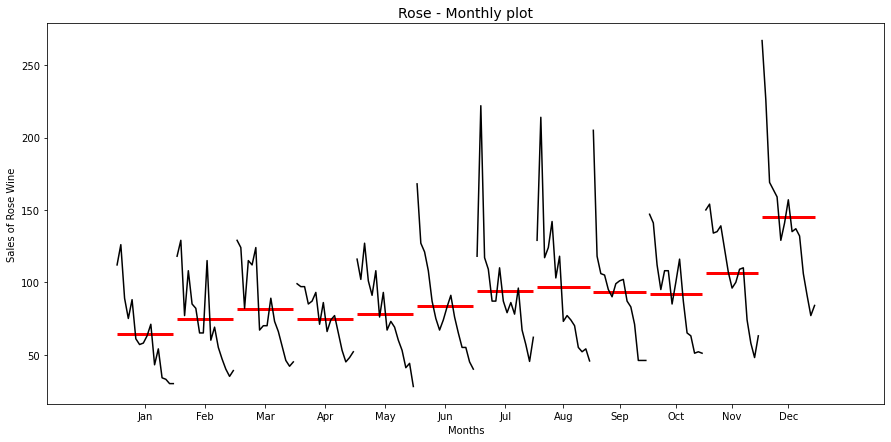

In [30]:
month_plot(df['Rose'],ylabel='Sales of Rose Wine')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize=14)

In [31]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Monthly sales over years of Sparkling Wine')

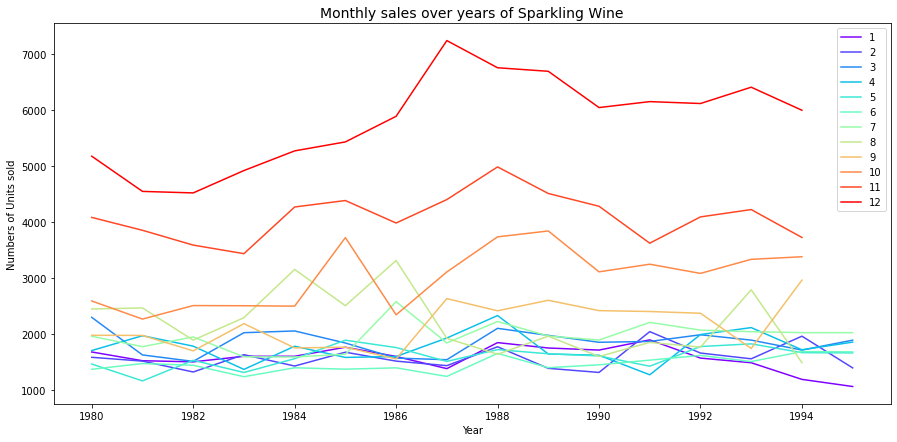

In [32]:
plt.figure.figsize=(15,8)
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Year')
plt.title('Monthly sales over years of Sparkling Wine', fontsize=14)

In [33]:
#Monthly Sales of Rose across Years
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.336957   45.673913   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

Text(0.5, 1.0, 'Monthly sales of Rose Wine over years')

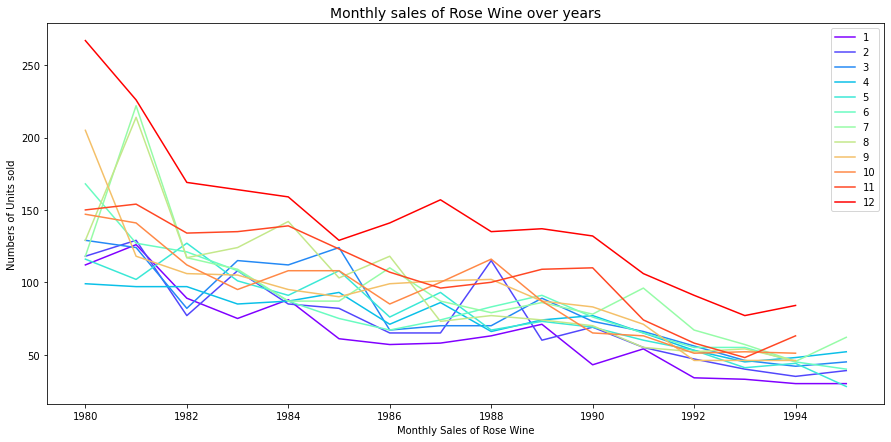

In [34]:
plt.figure.figsize=(15,8)
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Numbers of Units sold')
plt.xlabel('Monthly Sales of Rose Wine')
plt.title('Monthly sales of Rose Wine over years', fontsize=14)

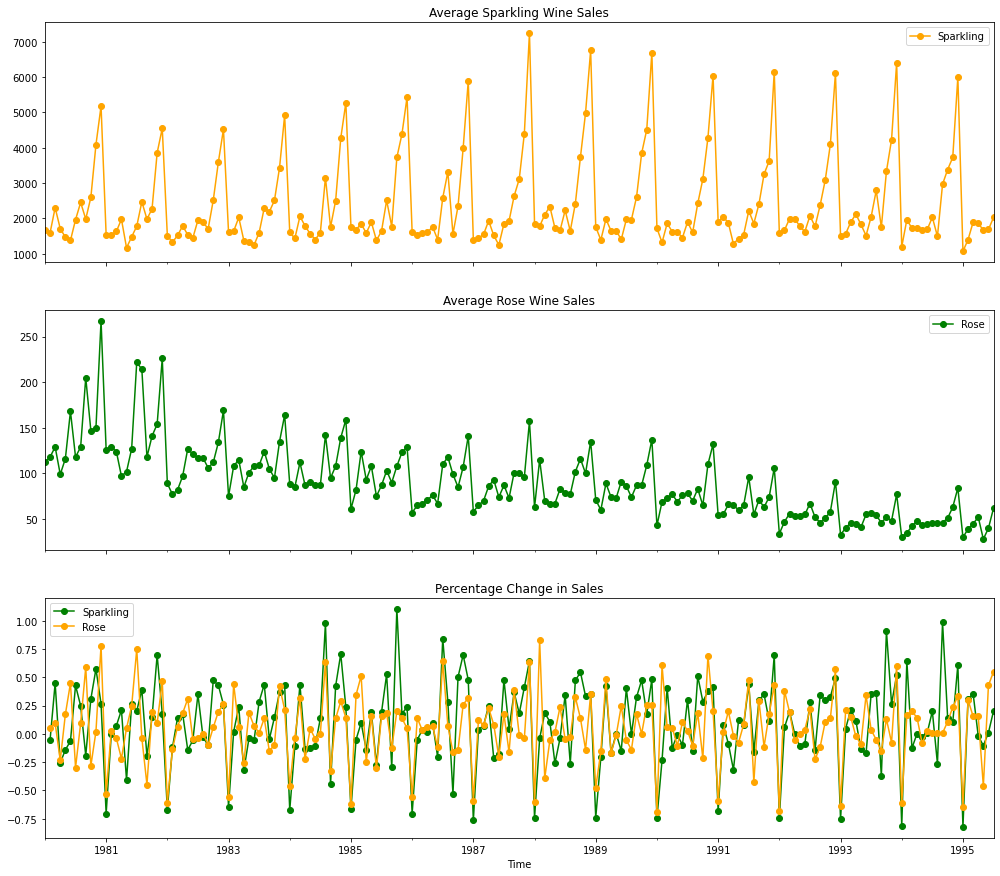

In [35]:
#Average sales per month on month percentage change of sales
# group by date and get average Sparkling & Rose sales, and precent change
average_s= df.groupby(df.index)['Sparkling'].mean()
average_r= df.groupby(df.index)['Rose'].mean()
pct_change_s= df.groupby(df.index)['Sparkling'].sum().pct_change()
pct_change_r= df.groupby(df.index)['Rose'].sum().pct_change()

fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(17,15))

# plotting average Sparkling sales over time(year-month)
ax1 = average_s.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales", color = 'orange')
ax2 = average_r.plot(legend=True,ax=axis2,marker='o',title="Average Rose Wine Sales", color = 'green')
# plotting precent change for Sales over time(year-month)
ax3 = pct_change_s.plot(legend=True,ax=axis3,marker='o',color='green',title="Percentage Change in Sales")
ax3 = pct_change_r.plot(legend=True,ax=axis3,marker='o',color='orange',title="Percentage Change in Sales")
plt.xlabel('Time')
plt.legend(loc='best');

#Decomposition

#for Sparkling

In [36]:
#Additive Decomposition
from    statsmodels.tsa.seasonal import   seasonal_decompose

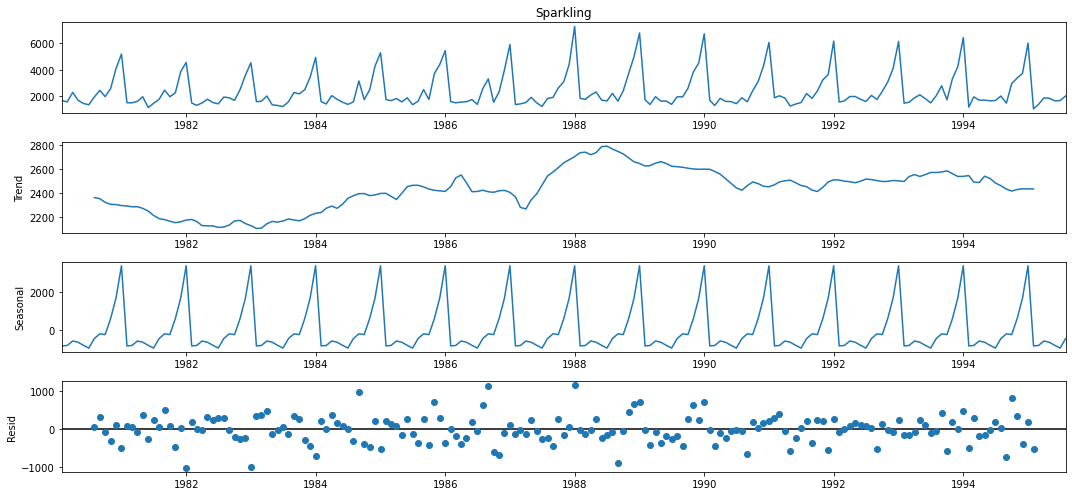

In [37]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

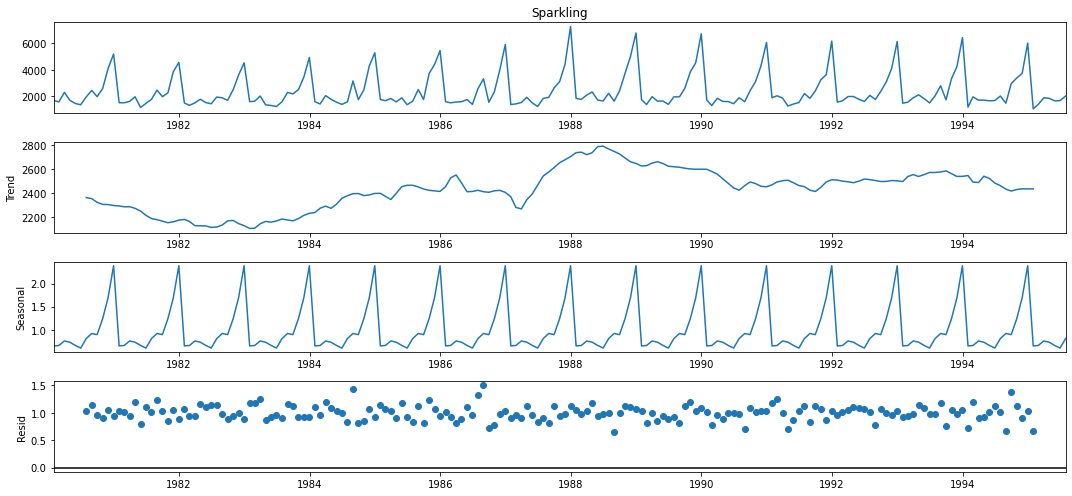

In [38]:
#Multiplicative
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64 



In [40]:
detrend_ts = seasonality + residual

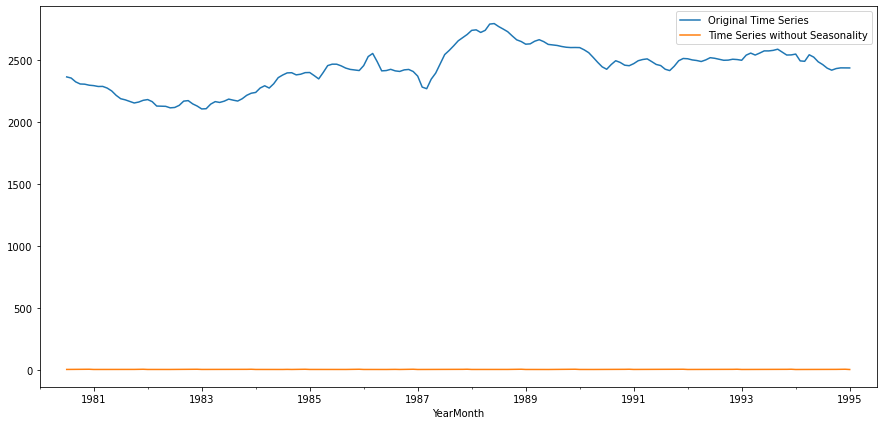

In [41]:
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality"]);

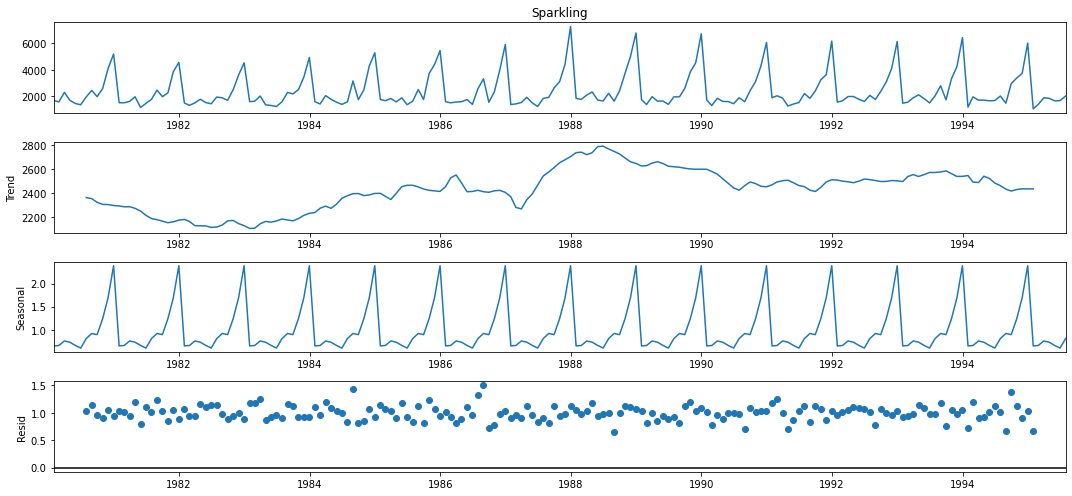

In [42]:
#Multiplicative Decomposition
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [43]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64 



# Rose Wine

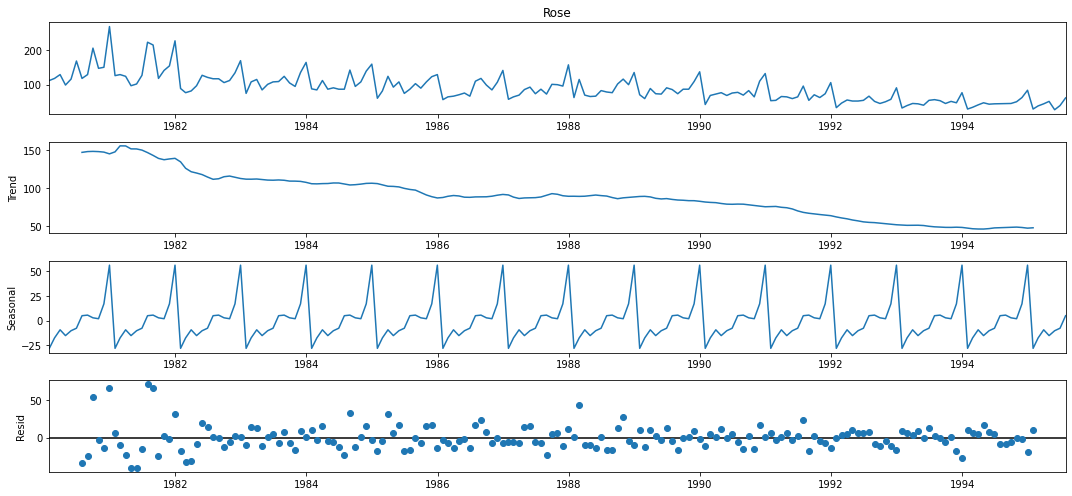

In [44]:
#Additive Decomposition
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
Name: resid, dtype: float64 



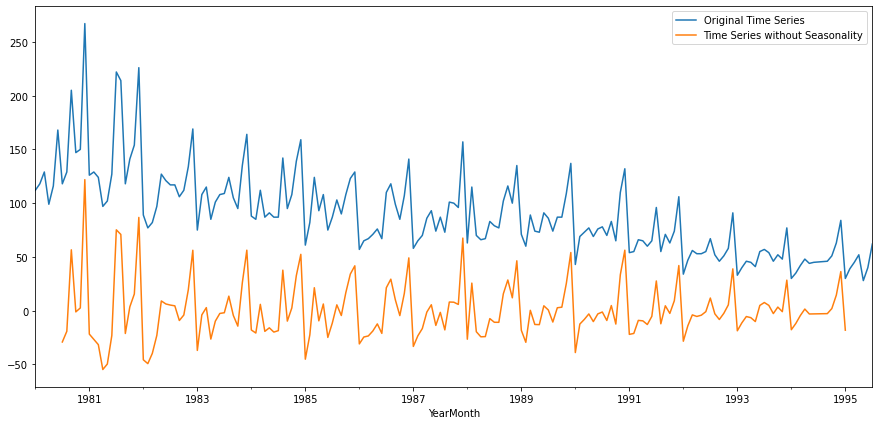

In [46]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality"]);

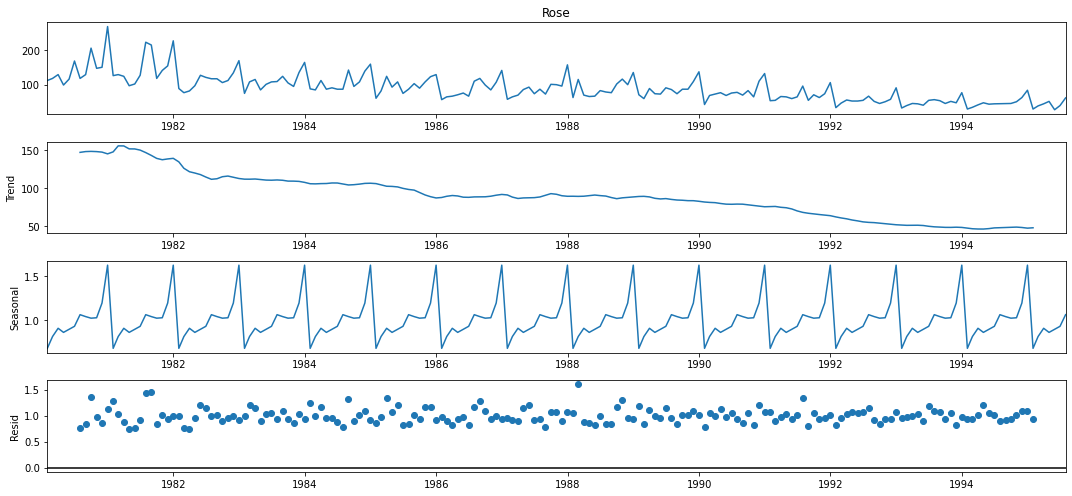

In [47]:
#Multiplicative Decomposition
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [48]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
Name: resid, dtype: float64 



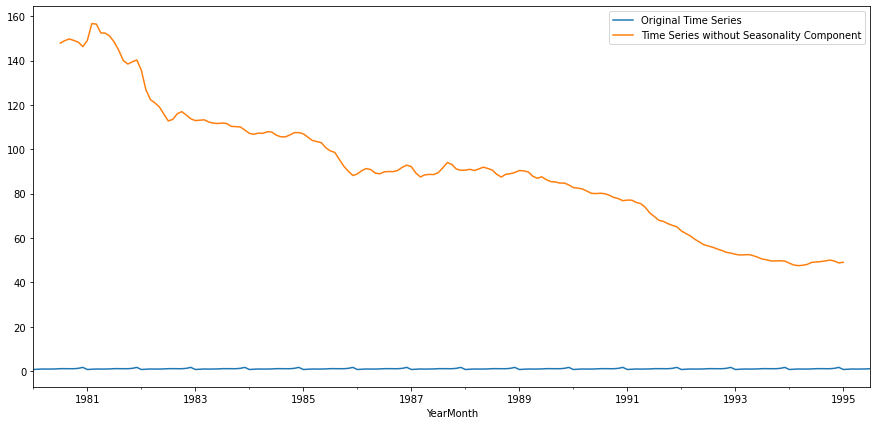

In [49]:
detrend_ts = trend + residual
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [50]:
train = df[df.index.year < 1991]
test = df[df.index.year>= 1991]

In [51]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

Last few rows of Training Data


Sparkling   Rose
YearMonth                   
1990-08-31       1605   70.0
1990-09-30       2424   83.0
1990-10-31       3116   65.0
1990-11-30       4286  110.0
1990-12-31       6047  132.0

First few rows of Test Data


Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

Last few rows of Test Data


Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [52]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


In [53]:
print("Dimensions of the training and test data")
print('Number of rows and columns of the training set :',train.shape)
print('Number of rows and columns of the training set :',test.shape)

Dimensions of the training and test data
Number of rows and columns of the training set : (132, 2)
Number of rows and columns of the training set : (55, 2)


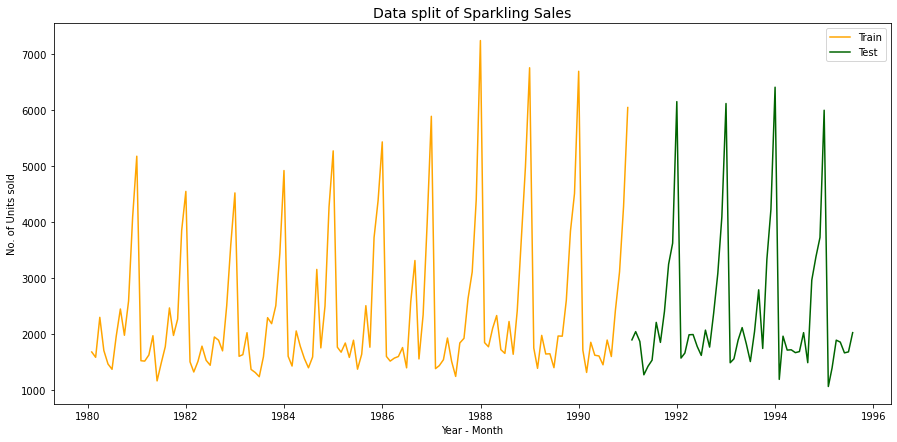

In [54]:
plt.figure(figsize = (15, 7))
plt.plot(train['Sparkling'], label = 'Train', color='orange')
plt.plot(test['Sparkling'], label = 'Test', color='darkgreen')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Data split of Sparkling Sales', fontsize = 14)
plt.show;


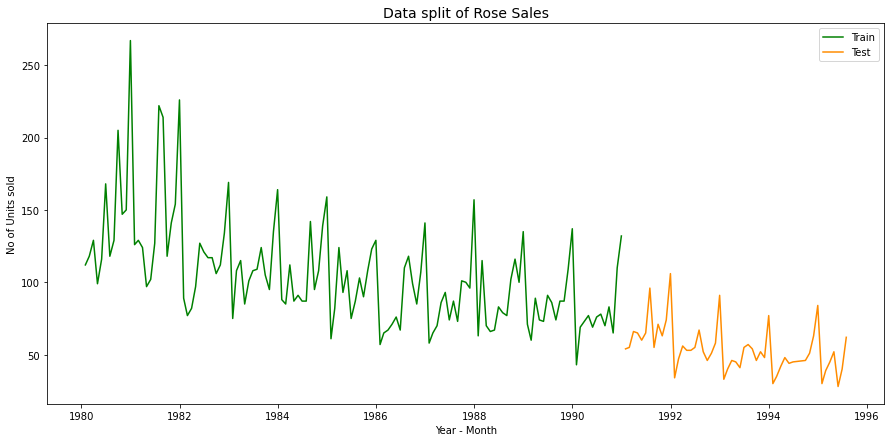

In [55]:
plt.figure(figsize = (15, 7))
plt.plot(train['Rose'], label = 'Train', color='green')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No of Units sold')
plt.title('Data split of Rose Sales', fontsize = 14)
plt.show;

Model 1: Linear Regression

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [57]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [58]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1980-01-31       1686  112.0     1
1980-02-29       1591  118.0     2
1980-03-31       2304  129.0     3
1980-04-30       1712   99.0     4
1980-05-31       1471  116.0     5 

Last few rows of Training Data 
             Sparkling   Rose  time
YearMonth                         
1990-08-31       1605   70.0   128
1990-09-30       2424   83.0   129
1990-10-31       3116   65.0   130
1990-11-30       4286  110.0   131
1990-12-31       6047  132.0   132 

First few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1991-01-31       1902  54.0   133
1991-02-28       2049  55.0   134
1991-03-31       1874  66.0   135
1991-04-30       1279  65.0   136
1991-05-31       1432  60.0   137 

Last few rows of Test Data 
             Sparkling  Rose  time
YearMonth                        
1995-03-31       1897  45.0   183
1995-04-30       1862  52.0   184
1995

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [60]:
#For sparkling wine

In [61]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

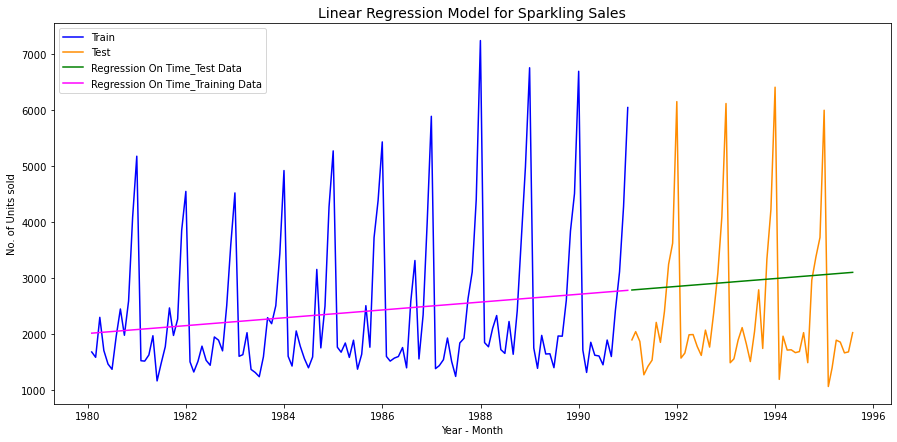

In [62]:
plt.plot( train['Sparkling'], label='Train', color = 'blue')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'green')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'magenta')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Linear Regression Model for Sparkling Sales', fontsize = 14);

In [63]:
#For Rose wine

In [64]:
lr2 = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [65]:
LinearRegression_train['RegOnTime_rose']= lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']= lr2.predict(LinearRegression_test[['time']])

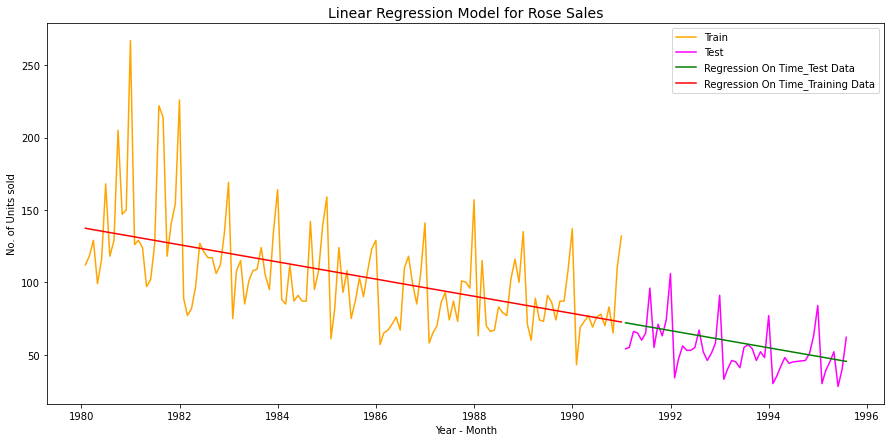

In [66]:
plt.plot( train['Rose'], label='Train', color = 'orange')
plt.plot(test['Rose'], label='Test', color = 'magenta')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'green')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Linear Regression Model for Rose Sales',fontsize=14);

Model Evaluation

In [67]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [68]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For Regression On Time forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))


For Regression On Time forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [69]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For Regression On Time forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))


For Regression On Time forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [70]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For Regression On Time forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))


For Regression On Time forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [71]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For Regression On Time forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))


For Regression On Time forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [72]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['Regression On Time'])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15

In [73]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['Regression On Time'])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time  15.268885      22.82

Model 2: Naive forecast

In [74]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

#For Sparkling Wine

In [75]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [76]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast Model for Sparkling Wine')

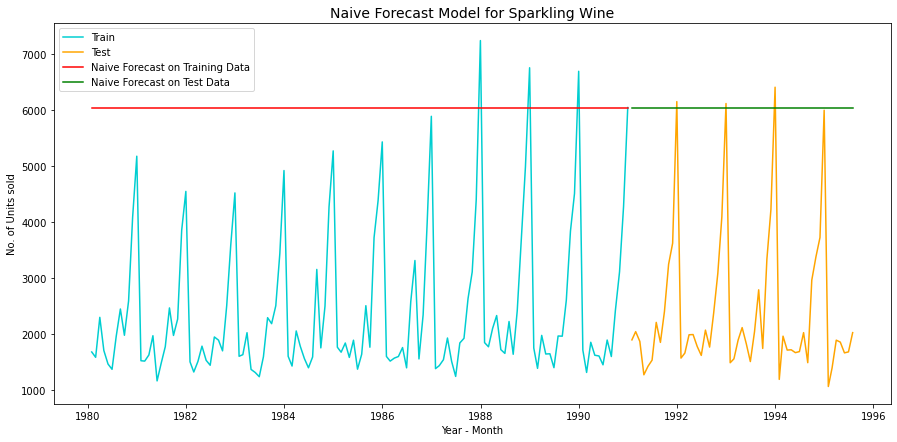

In [77]:
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title("Naive Forecast Model for Sparkling Wine", fontsize = 14)

#Rose Wine

In [78]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [79]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Naive Forecast Model for Rose Wine')

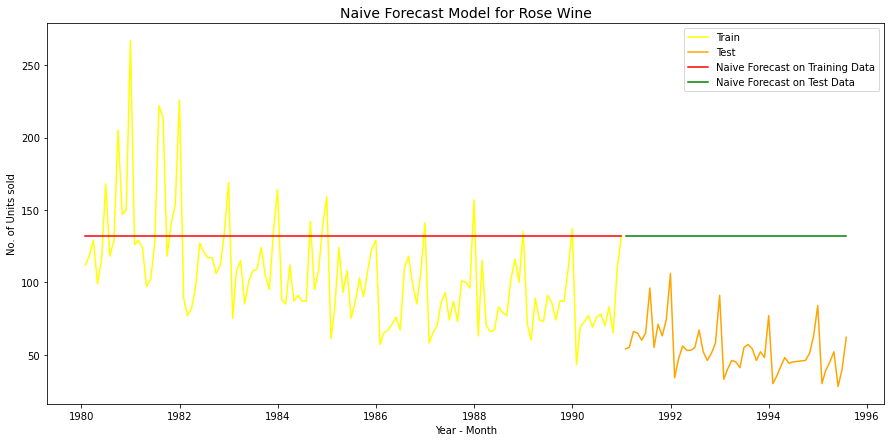

In [80]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'yellow')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title("Naive Forecast Model for Rose Wine", fontsize = 14)

#Model Evauation

In [81]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast Model on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast Model on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [82]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast Model on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast Model on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [83]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast Model on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast Model on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [84]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast Model on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast Model on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [85]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87

In [86]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time  15.268885      22.82
NaiveModel          79.718559     145.10

Model 3: Simple Average

In [87]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [88]:
#for Sparkling wine
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [89]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'SimpleAverage Forecast for Sparkling Wine')

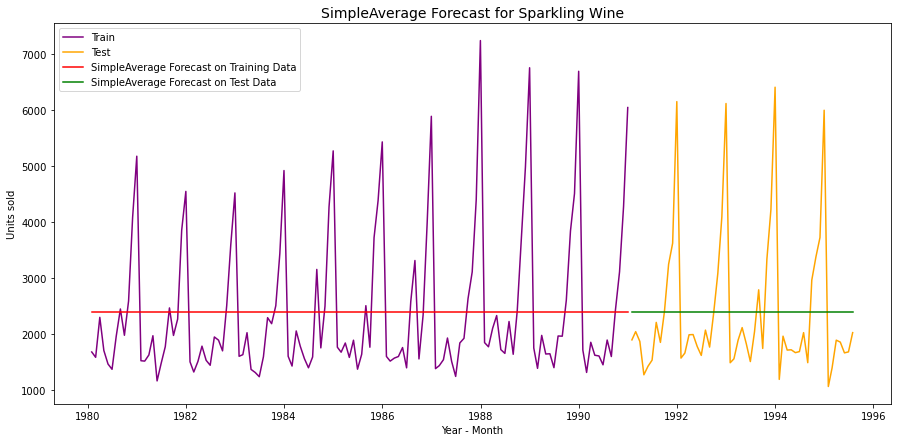

In [90]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'purple')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("SimpleAverage Forecast for Sparkling Wine", fontsize=14)

Rose Wine

In [91]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [92]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'SimpleAverage Forecast Model on Rose Wine')

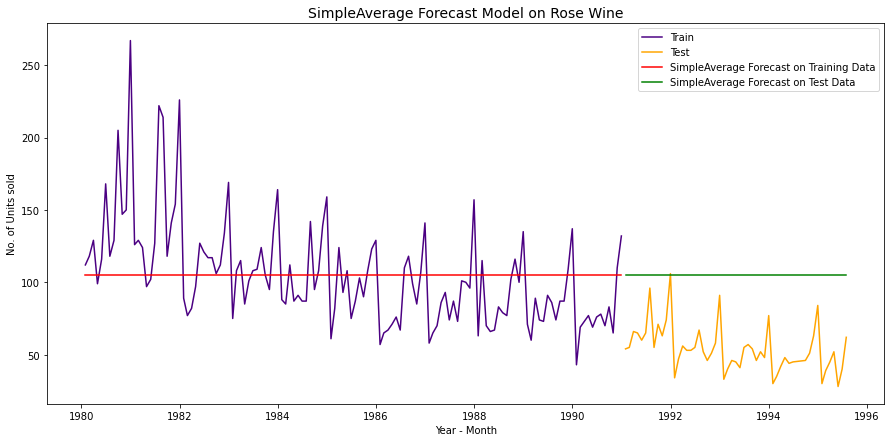

In [93]:
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'indigo')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title("SimpleAverage Forecast Model on Rose Wine", fontsize=14)

Model Evaluation

In [94]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast Model on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast Model on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [95]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast Model on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast Model on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [96]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast Model on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast Model on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [97]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast Model on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast Model on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [98]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90

In [99]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf


Test RMSE  Test MAPE
Regression On Time  15.268885      22.82
NaiveModel          79.718559     145.10
SimpleAverage       53.460350      94.93

Model 4: Moving Average

In [100]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling   Rose
YearMonth                   
1980-01-31       1686  112.0
1980-02-29       1591  118.0
1980-03-31       2304  129.0
1980-04-30       1712   99.0
1980-05-31       1471  116.0

In [101]:

MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Sparkling   Rose  Spark_Trailing_2  Spark_Trailing_4  \
YearMonth                                                          
1980-01-31       1686  112.0               NaN               NaN   
1980-02-29       1591  118.0            1638.5               NaN   
1980-03-31       2304  129.0            1947.5               NaN   
1980-04-30       1712   99.0            2008.0           1823.25   
1980-05-31       1471  116.0            1591.5           1769.50   

            Spark_Trailing_6  Spark_Trailing_9  Rose_Trailing_2  \
YearMonth                                                         
1980-01-31               NaN               NaN              NaN   
1980-02-29               NaN               NaN            115.0   
1980-03-31               NaN               NaN            123.5   
1980-04-30               NaN               NaN            114.0   
1980-05-31               NaN               NaN            107.5   

            Rose_Trailing_4  Rose_Trailing_6  Rose_Trailing_9  
YearMonth                                                      
1980-01-31              NaN              NaN              NaN  
1980-02-29              NaN              NaN              NaN  
1980-03-31              NaN              NaN              NaN  
1980-04-30            114.5              NaN              NaN  
1980-05-31            115.5              NaN              NaN

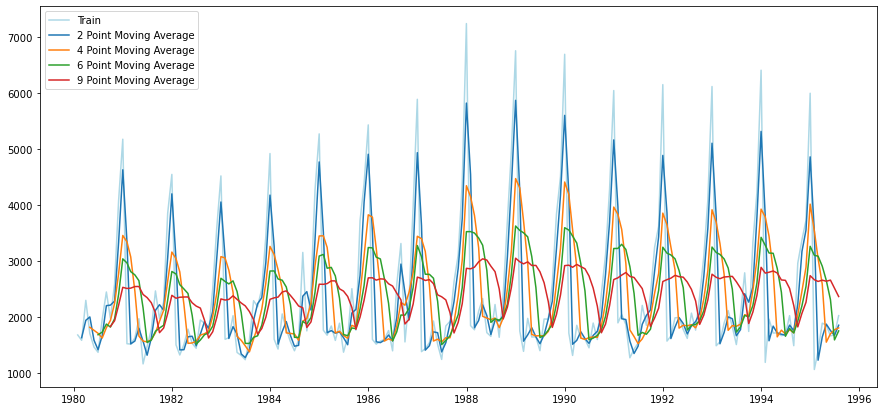

In [102]:
#For Sparkling Wine
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [103]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Trailing Moving Average Forecast Model for Sparkling Wine')

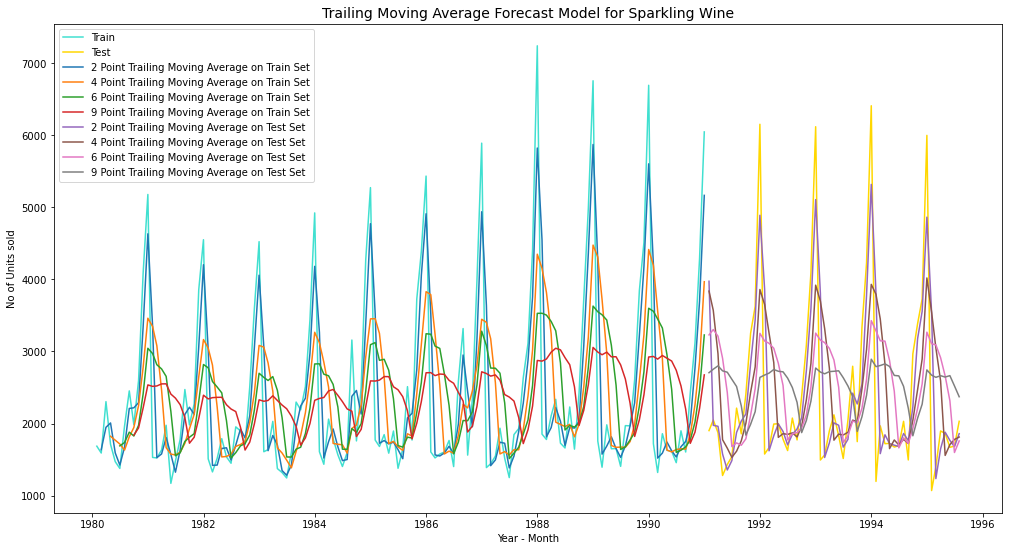

In [104]:
## Plotting on both the Training and Test data

plt.figure(figsize=(17,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('No of Units sold')

plt.title("Trailing Moving Average Forecast Model for Sparkling Wine", fontsize=14)

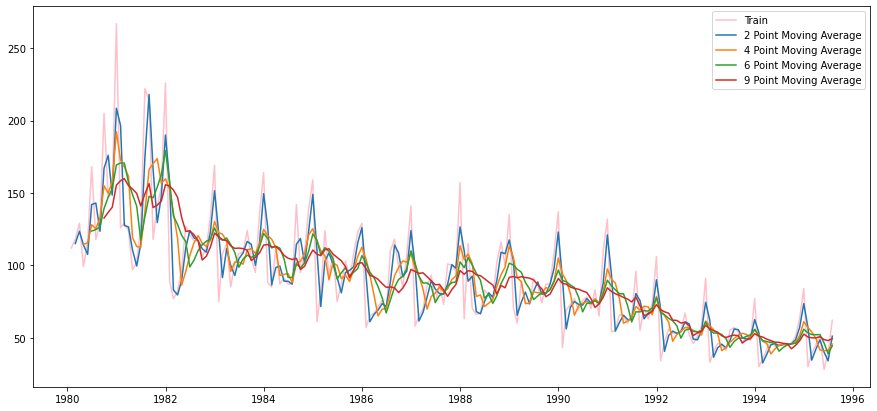

In [105]:
#For Rose Wine
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

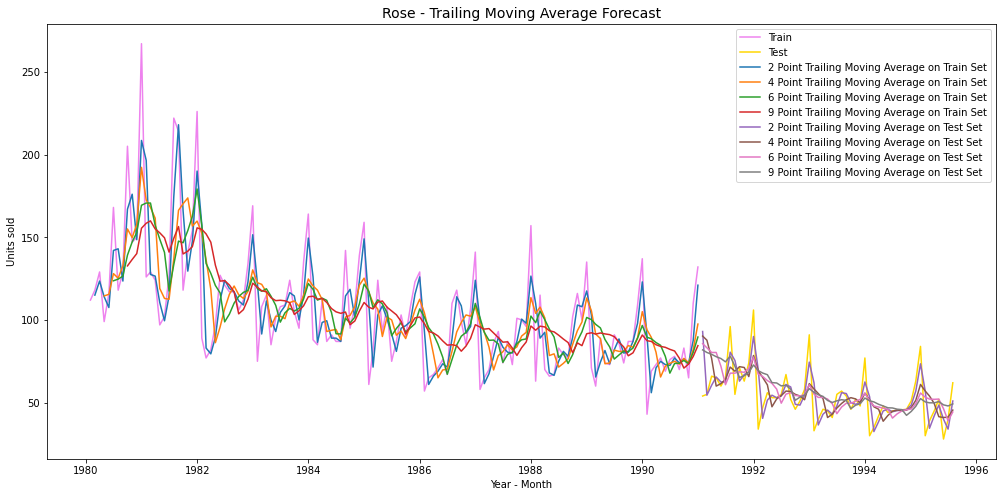

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(17,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

Model Evaluation

In [107]:
#For Sparkling Wine Test Data
## Test Data - rmse_spark and mape_spark for 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark for 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark for 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark for 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [108]:
#for Rose Wine Test Data
## Test Data - rmse_rose and mape_rose for 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose for 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose for 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose for 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [109]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90
2 point TMA          813.400684      19.70
4 point TMA         1156.589694      35.96
6 point TMA         1283.927428      43.86
9 point TMA         1346.278315      46.86

In [110]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time  15.268885      22.82
NaiveModel          79.718559     145.10
SimpleAverage       53.460350      94.93
2 point TMA         11.529278      13.54
4 point TMA         14.451364      19.49
6 point TMA         14.566269      20.82
9 point TMA         14.727594      21.01

#Model 5: Simple Exponential Smoothing

In [111]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [112]:
SES_train = train.copy()
SES_test = test.copy()

In [113]:
SES_train['Sparkling'].head()

YearMonth
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [114]:
SES_train['Rose'].head()

YearMonth
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

In [115]:
#For Sparkling Wine
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


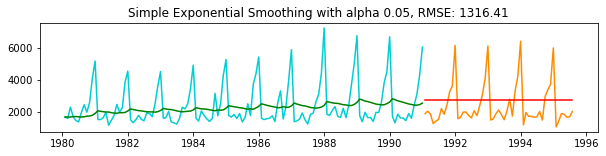

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


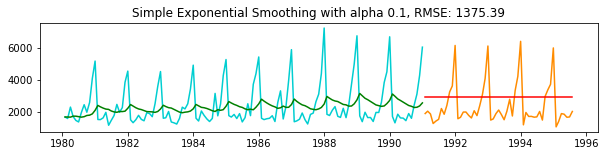

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


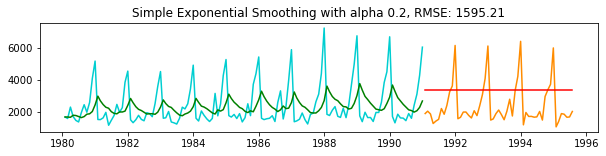

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


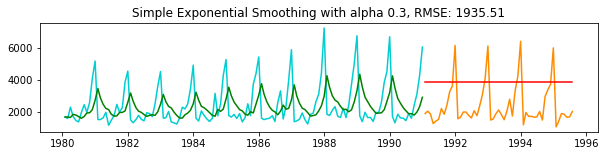

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


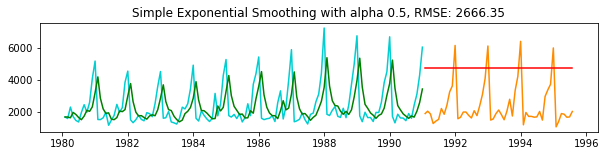

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


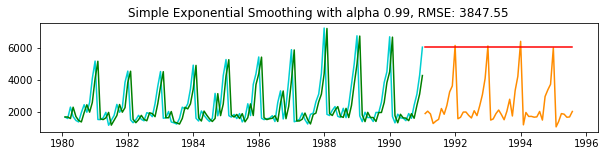

In [116]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() 


for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])
    


    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2))) 
    plt.show();

In [117]:
model_SES_autofit = model.fit(optimized=True)

In [118]:
model_SES_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [119]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark
YearMonth                                  
1980-01-31       1686  112.0    1818.504754
1980-02-29       1591  118.0    1811.931644
1980-03-31       2304  129.0    1800.971977
1980-04-30       1712   99.0    1825.925486
1980-05-31       1471  116.0    1820.274030

In [120]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark
YearMonth                                 
1991-01-31       1902  54.0    2724.929339
1991-02-28       2049  55.0    2724.929339
1991-03-31       1874  66.0    2724.929339
1991-04-30       1279  65.0    2724.929339
1991-05-31       1432  60.0    2724.929339

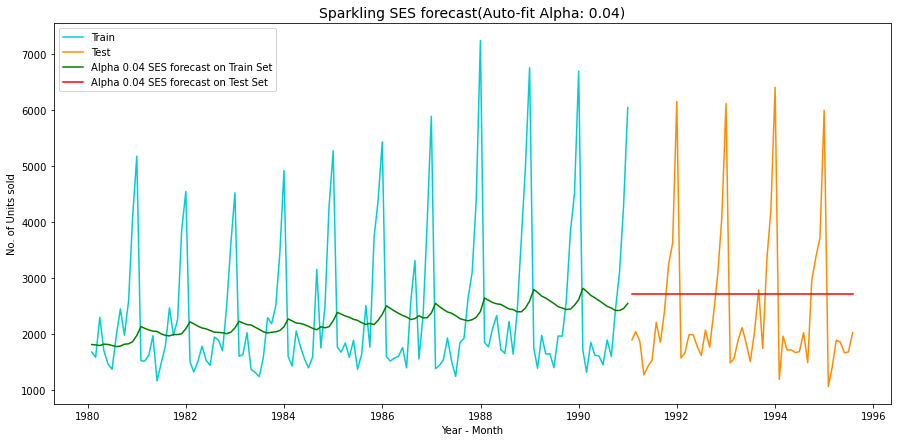

In [121]:
## Plotting on both the Training and Test data
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.04 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.04 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.04)', fontsize = 14);

In [122]:
#For Rose Wine
model_rose = SimpleExpSmoothing(SES_train['Rose'])

Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


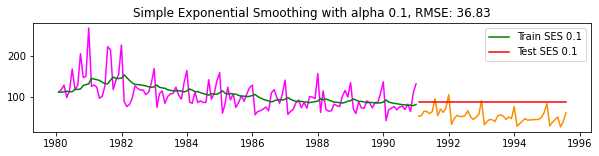

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


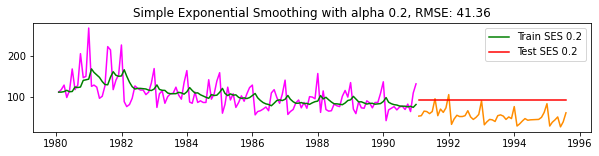

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


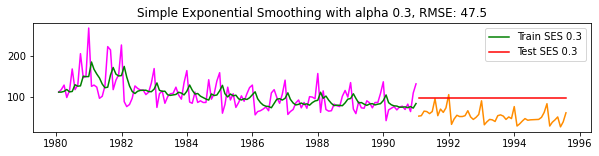

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


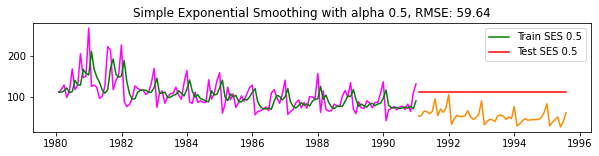

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


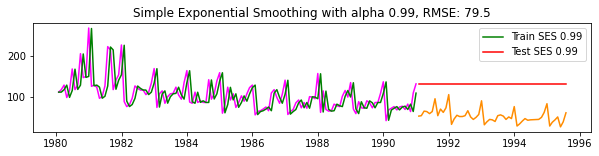

In [123]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() 


for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])
    


    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [124]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [125]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Sparkling   Rose  predict_spark  predict_rose
YearMonth                                                
1980-01-31       1686  112.0    1818.504754    134.386811
1980-02-29       1591  118.0    1811.931644    132.176115
1980-03-31       2304  129.0    1800.971977    130.776224
1980-04-30       1712   99.0    1825.925486    130.600822
1980-05-31       1471  116.0    1820.274030    127.480242

In [126]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  Rose  predict_spark  predict_rose
YearMonth                                               
1991-01-31       1902  54.0    2724.929339     87.105001
1991-02-28       2049  55.0    2724.929339     87.105001
1991-03-31       1874  66.0    2724.929339     87.105001
1991-04-30       1279  65.0    2724.929339     87.105001
1991-05-31       1432  60.0    2724.929339     87.105001

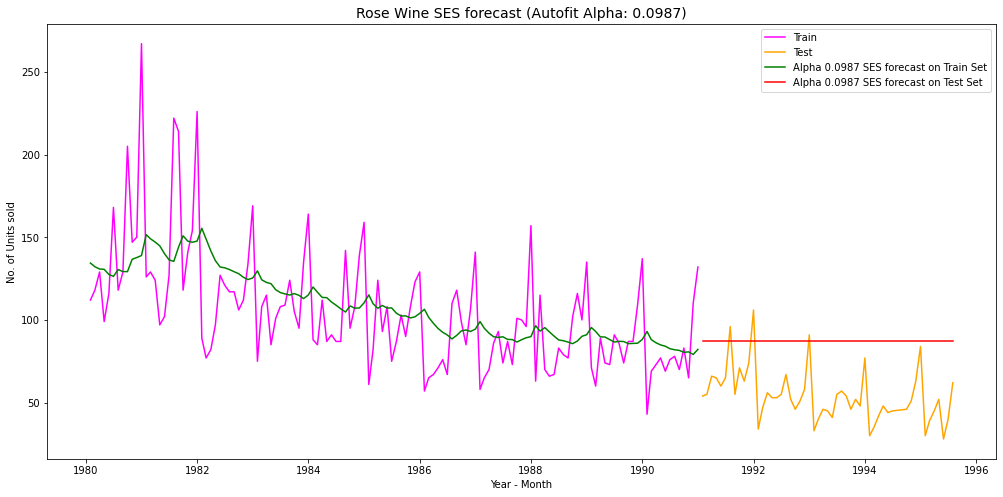

In [127]:
plt.figure(figsize=(17,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Rose Wine SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

#Model Evaluation

In [128]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [129]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [130]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [131]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [132]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time  1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverage       1275.081804      38.90
2 point TMA          813.400684      19.70
4 point TMA         1156.589694      35.96
6 point TMA         1283.927428      43.86
9 point TMA         1346.278315      46.86
SES Alpha 0.00      1316.034674      45.47

In [133]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time  15.268885      22.82
NaiveModel          79.718559     145.10
SimpleAverage       53.460350      94.93
2 point TMA         11.529278      13.54
4 point TMA         14.451364      19.49
6 point TMA         14.566269      20.82
9 point TMA         14.727594      21.01
SES Alpha 0.01      36.796020      63.88

Model 6: Double Exponential Smoothing (Holt's Model)

In [134]:
DES_train = train.copy()
DES_test = test.copy()

In [135]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [136]:
#For sparkling wine
model_DES = Holt(DES_train['Sparkling'])

In [137]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [138]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
20    0.3   0.1     1428.27       46.92    5908.19     223.50

In [139]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
3     0.1   0.4     1466.77       48.27    6042.38     219.09

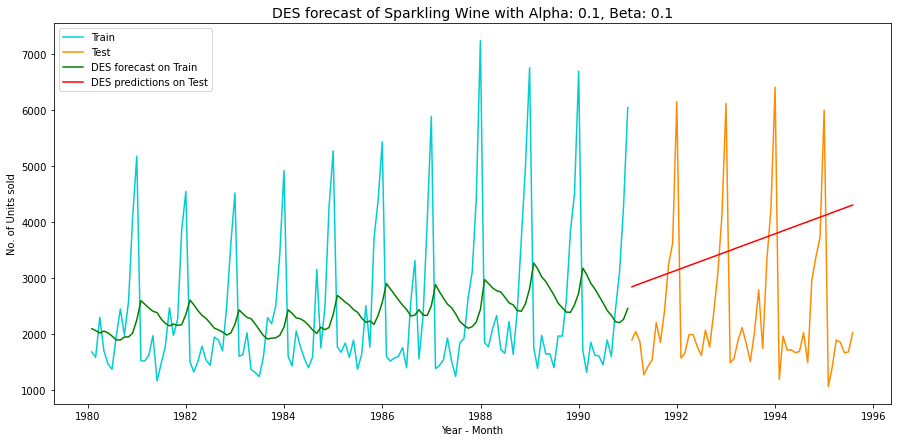

In [140]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('DES forecast of Sparkling Wine with Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

In [141]:
#Trying autofit for the model
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [142]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [143]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [144]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues

In [145]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))

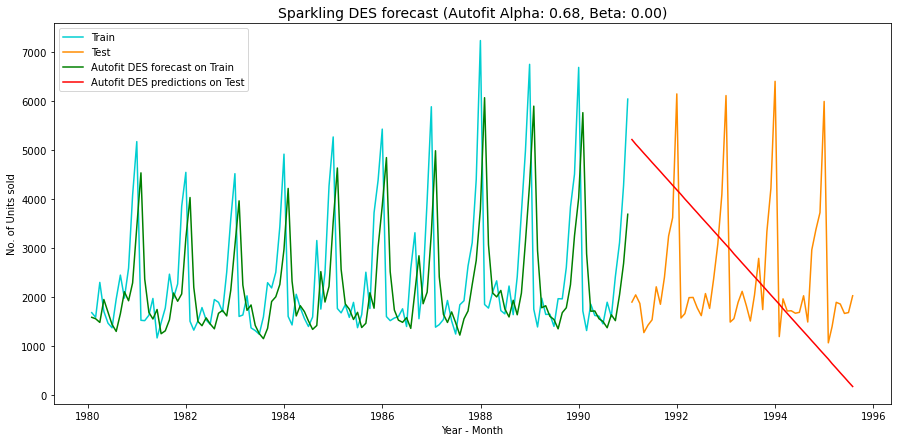

In [146]:
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.68, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [147]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [148]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [149]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

For Rose Wine

In [150]:
model_DES_rose = Holt(DES_train['Rose'])

In [151]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_trend=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [152]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056912      64.02
1     0.1   0.2   32.685228       23.63  48.806923      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209399     131.33
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [153]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056912      64.02
1     0.1   0.2   32.685228       23.63  48.806923      83.29
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   32.925494       24.23  78.209399     131.33
3     0.1   0.4   33.179749       24.75  99.554565     165.49

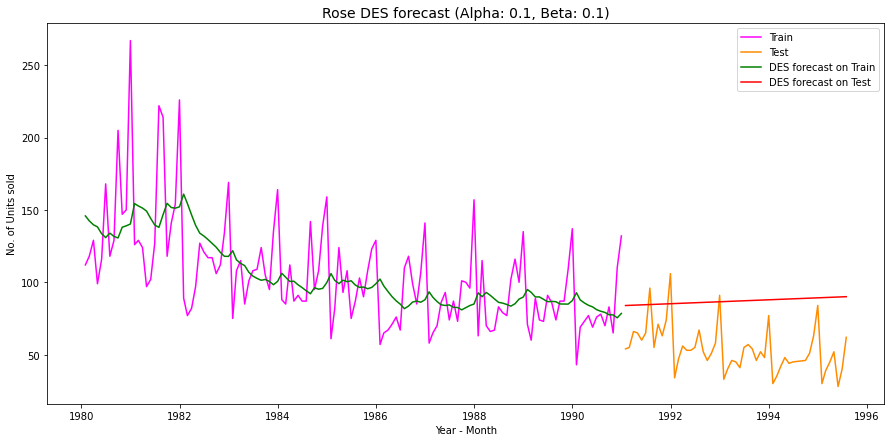

In [154]:
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

In [155]:
#Attempting autofit
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [156]:
model_DES_rose_autofit.params

{'smoothing_level': 0.12981260063088668,
 'smoothing_trend': 0.05376220098709802,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 145.73070601479063,
 'initial_trend': -0.10069596155782001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [157]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [158]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [159]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

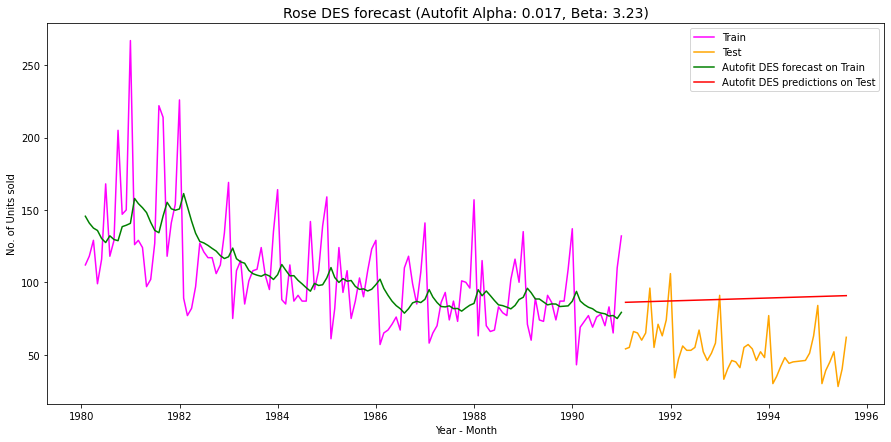

In [160]:
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.017, Beta: 3.23)', fontsize=14)

plt.legend(loc='best')

In [161]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [162]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()


Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056912      64.02
100  0.129813  0.053762   31.922633       22.52  38.281319      66.37
1    0.100000  0.200000   32.685228       23.63  48.806923      83.29
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
2    0.100000  0.300000   32.925494       24.23  78.209399     131.33

In [163]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056912      64.02
100  0.129813  0.053762   31.922633       22.52  38.281319      66.37
1    0.100000  0.200000   32.685228       23.63  48.806923      83.29
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
2    0.100000  0.300000   32.925494       24.23  78.209399     131.33

Model Evaluation

In [164]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time      1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1316.034674      45.47
DES Alpha 0.1,Beta 0.1  1779.420000      67.23
DES Alpha 0.6,Beta 0.0  2007.238526      68.23

In [165]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.017, Beta 3.23','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time          15.268885      22.82
NaiveModel                  79.718559     145.10
SimpleAverage               53.460350      94.93
2 point TMA                 11.529278      13.54
4 point TMA                 14.451364      19.49
6 point TMA                 14.566269      20.82
9 point TMA                 14.727594      21.01
SES Alpha 0.01              36.796020      63.88
DES Alpha 0.017, Beta 3.23  38.281319      66.37
DES Alpha 0.10, Beta 0.10   37.056912      64.02

Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [166]:
TES_train = train.copy()
TES_test = test.copy()

In [167]:
#Sparkling Wine
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [168]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [169]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  374.487383       11.23  314.742310      10.38
211    0.3   0.2    0.2  377.449542       11.22  314.951973      10.07
300    0.4   0.1    0.1  370.612639       11.03  318.103555      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.545805       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.256068      10.54

In [170]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.664058       13.44  336.636929       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.545805       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103555      10.01
211    0.3   0.2    0.2  377.449542       11.22  314.951973      10.07
301    0.4   0.1    0.2  374.487383       11.23  314.742310      10.38

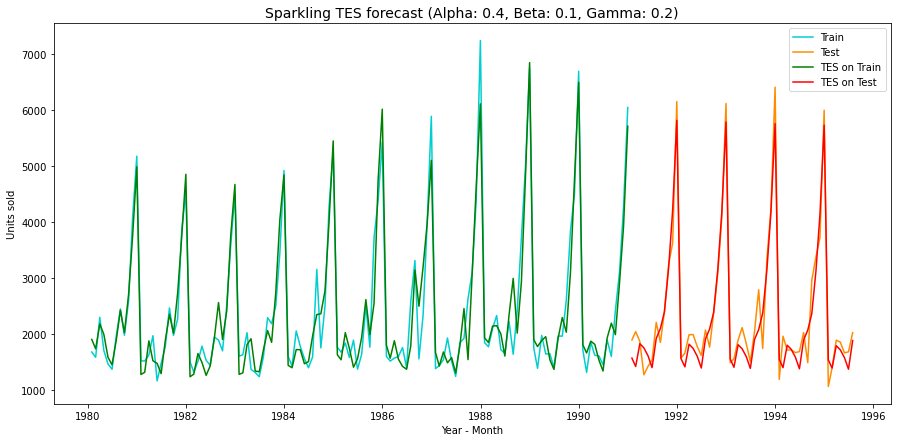

In [171]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [172]:
#Autofit of TES
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [173]:
model_TES_autofit.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [174]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [175]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [176]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

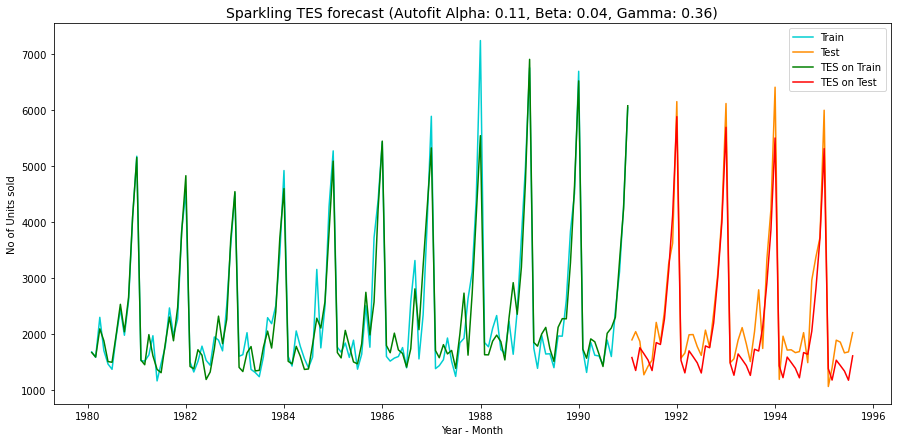

In [177]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('No of Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.04, Gamma: 0.36)', fontsize=14)

plt.legend(loc='best')

In [178]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [179]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma    Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00  1.00   0.70  2.660015e+05     1554.57  8.649577e+06  188660.61
997    1.00  1.00   0.80  1.101923e+06     7348.46  2.700435e+05    5645.84
998    1.00  1.00   0.90  7.695708e+04     1220.71  2.472201e+05    6434.67
999    1.00  1.00   1.00  2.456050e+04      467.65  1.256914e+05    2789.45
1000   0.11  0.05   0.36  3.557527e+02       10.19  4.065102e+02      14.02

In [180]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
301    0.4   0.1    0.2  374.487383       11.23  314.742310      10.38
211    0.3   0.2    0.2  377.449542       11.22  314.951973      10.07
300    0.4   0.1    0.1  370.612639       11.03  318.103555      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.545805       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.256068      10.54

In [181]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.664058       13.44  336.636929       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.545805       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103555      10.01
211    0.3   0.2    0.2  377.449542       11.22  314.951973      10.07
301    0.4   0.1    0.2  374.487383       11.23  314.742310      10.38

In [182]:
#For Rose Wine
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [183]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE':[],'Test MAPE':[]})

In [184]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [185]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171629      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493828      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682587      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885716      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896168      14.16

In [186]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171629      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375325      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169697      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493828      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682587      13.71

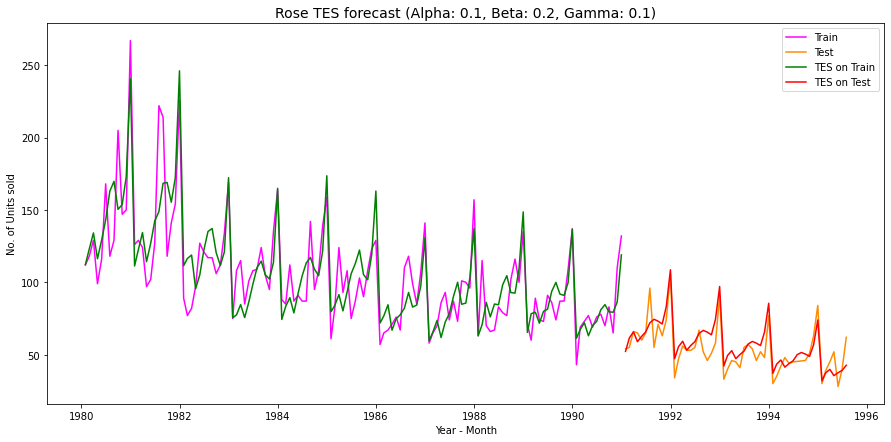

In [187]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.1], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.1], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.1)', fontsize=14)

plt.legend(loc='best')

In [188]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [189]:
model_TES_autofit.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [190]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [191]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

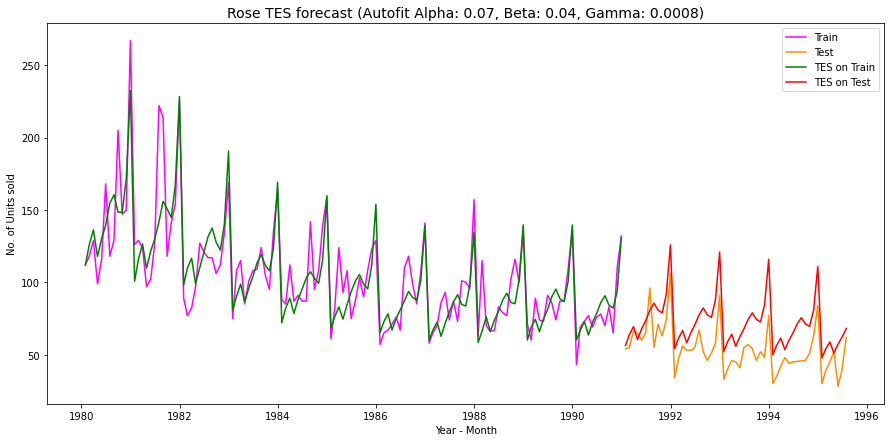

In [192]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('No. of Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.07, Beta: 0.04, Gamma: 0.0008)', fontsize=14)

plt.legend(loc='best')

In [193]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [194]:
resultsDf_7_2.tail()

Alpha      Beta         Gamma    Train RMSE  Train MAPE  \
996   1.000000  1.000000  7.000000e-01  1.360749e+06   312853.57   
997   1.000000  1.000000  8.000000e-01  2.438213e+03      628.69   
998   1.000000  1.000000  9.000000e-01  2.883580e+04     3026.25   
999   1.000000  1.000000  1.000000e+00  1.577905e+03      583.77   
1000  0.071321  0.045538  8.356711e-07  1.840583e+01       12.58   

         Test RMSE  Test MAPE  
996   19892.158246   17141.29  
997    2573.842682    1998.89  
998    3522.899085    2624.26  
999    3104.659378    3720.26  
1000     20.190718      33.69

In [195]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171629      13.19
11     0.1   0.2    0.2   20.140683       14.66   9.493828      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682587      13.71
142    0.2   0.5    0.3   23.300524       17.35   9.885716      14.21
12     0.1   0.2    0.3   20.725703       14.88   9.896168      14.16

In [196]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
10     0.1   0.2    0.1   19.651464       14.31   9.171629      13.19
243    0.3   0.5    0.4   25.873405       17.54  10.375325      13.26
223    0.3   0.3    0.4   24.209084       16.78  10.169697      13.67
11     0.1   0.2    0.2   20.140683       14.66   9.493828      13.68
151    0.2   0.6    0.2   22.793871       17.02   9.682587      13.71

Model Evaluation

In [197]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.11, Beta 0.04, Gamma 0.036'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1316.034674      45.47
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02

In [198]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1316.034674      45.47
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

In [199]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.1','TES Alpha 0.07, Beta 0.04, Gamma 0.0008'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time                       15.268885      22.82
NaiveModel                               79.718559     145.10
SimpleAverage                            53.460350      94.93
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.017, Beta 3.23               38.281319      66.37
DES Alpha 0.10, Beta 0.10                37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69

In [200]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
Regression On Time                       15.268885      22.82
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.10, Beta 0.10                37.056912      64.02
DES Alpha 0.017, Beta 3.23               38.281319      66.37
SimpleAverage                            53.460350      94.93
NaiveModel                               79.718559     145.10

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

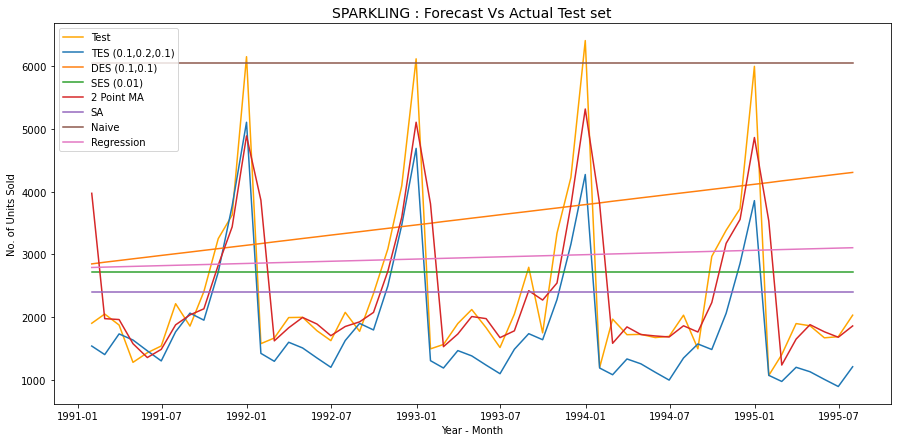

In [201]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
plt.plot(TES_test['predict_spark',0.1,0.2,0.1],  label='TES (0.1,0.2,0.1)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.01)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('No. of Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)

Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

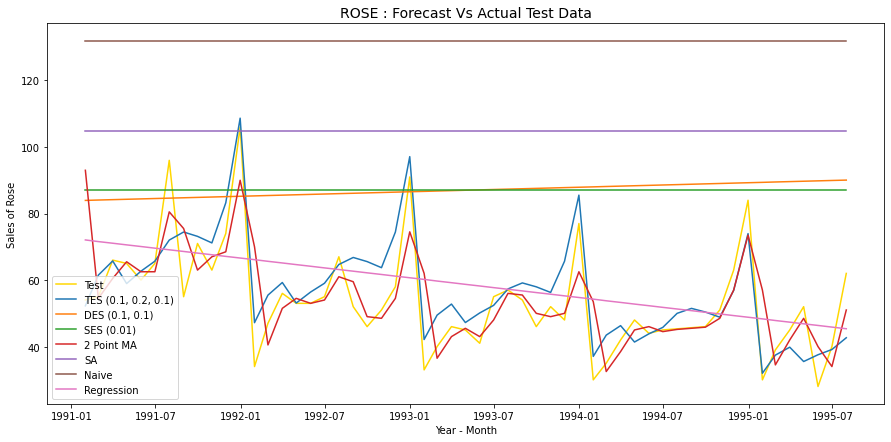

In [202]:
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#TES
plt.plot(TES_test['predict_rose',0.1,0.2,0.1],  label='TES (0.1, 0.2, 0.1)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.01)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)

In [203]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    
    rolmean = timeseries.rolling(window=7).mean() 
    rolstd = timeseries.rolling(window=7).std()   

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

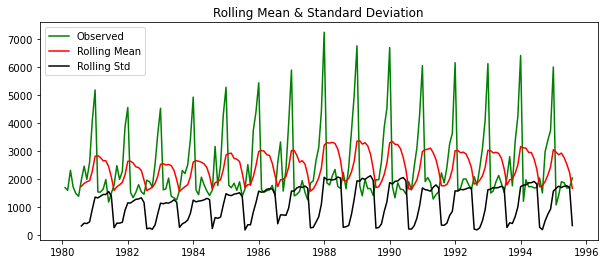

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [204]:
#For Sparkling
#Original series
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'green')

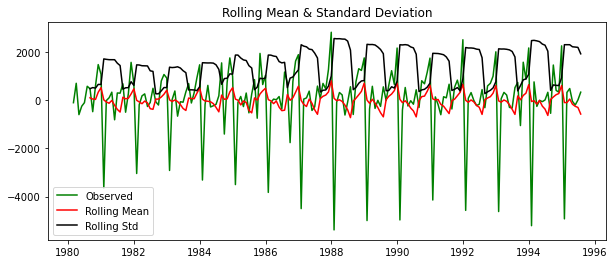

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [205]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'green')

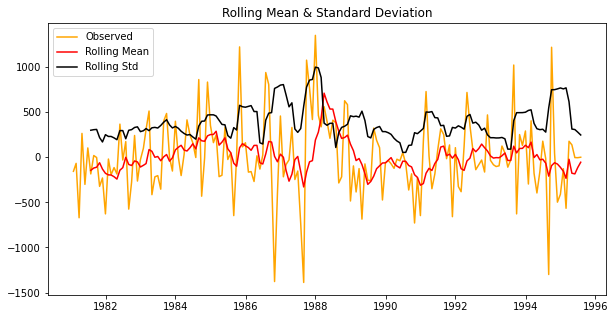

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [206]:
#Difference of original series
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'orange')

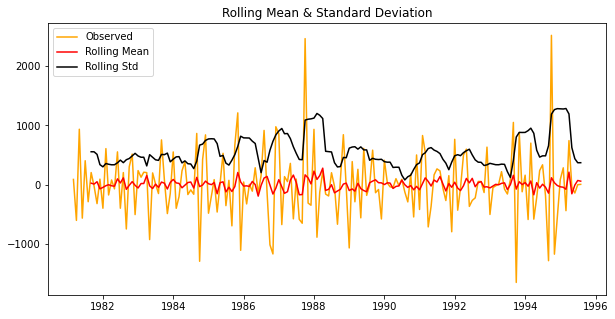

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [207]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'orange')

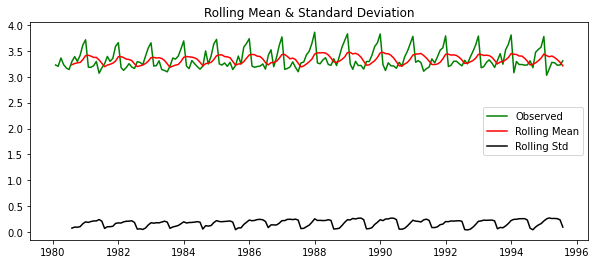

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [208]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'green')

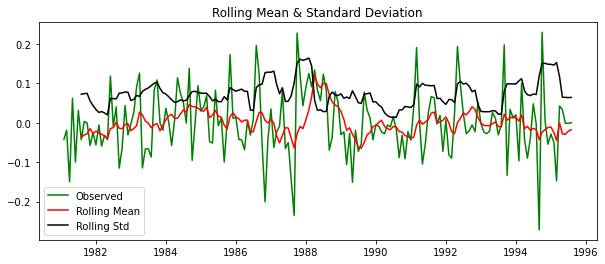

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [209]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'green')

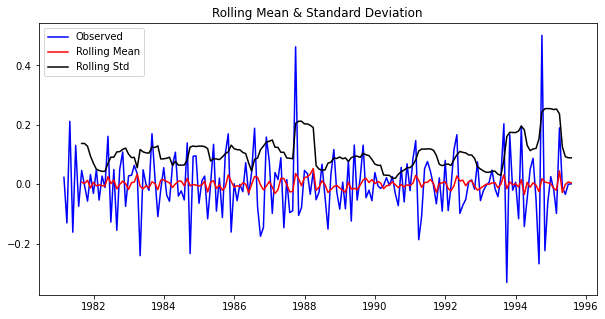

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [210]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'blue')

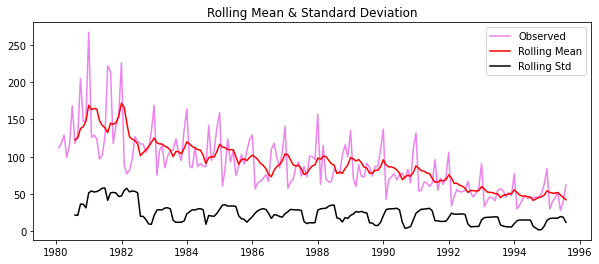

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [211]:
#For Rose Wine
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

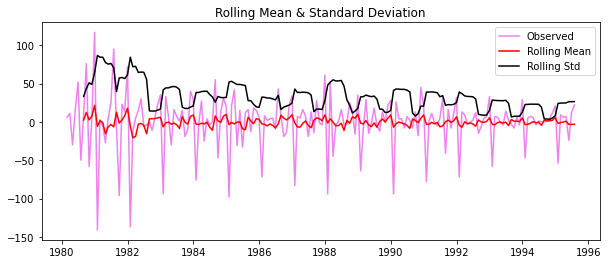

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [212]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

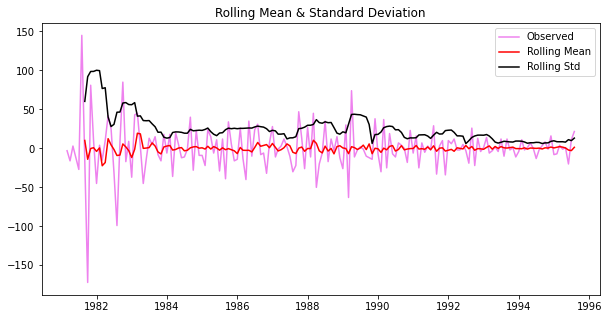

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [213]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

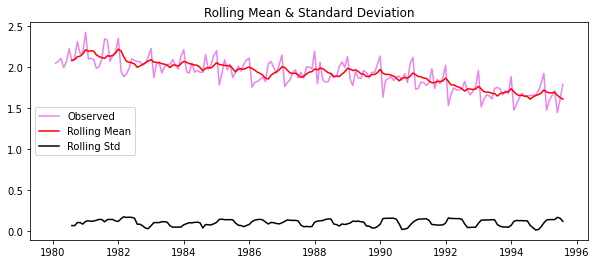

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [214]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

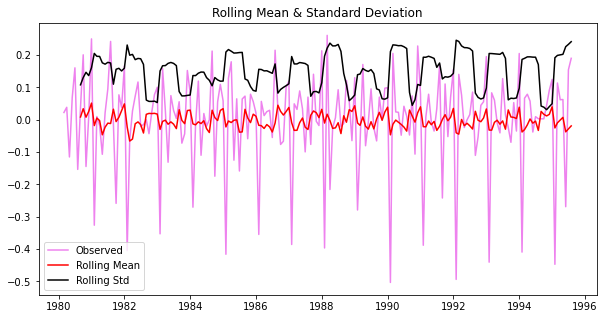

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [215]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [216]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [217]:
#Sparkling

<Figure size 720x360 with 0 Axes>

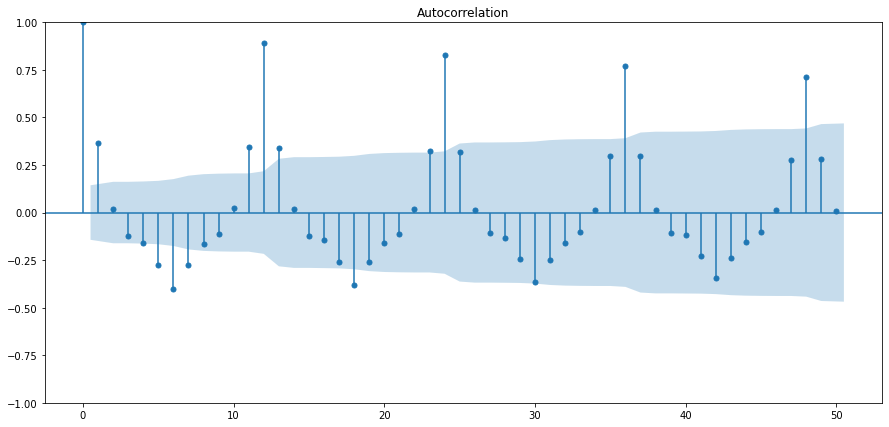

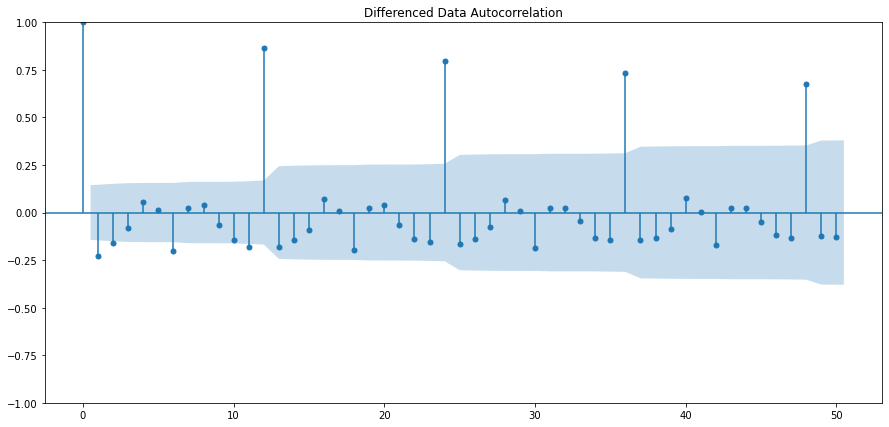

In [218]:
#ACF plots
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

<Figure size 720x360 with 0 Axes>

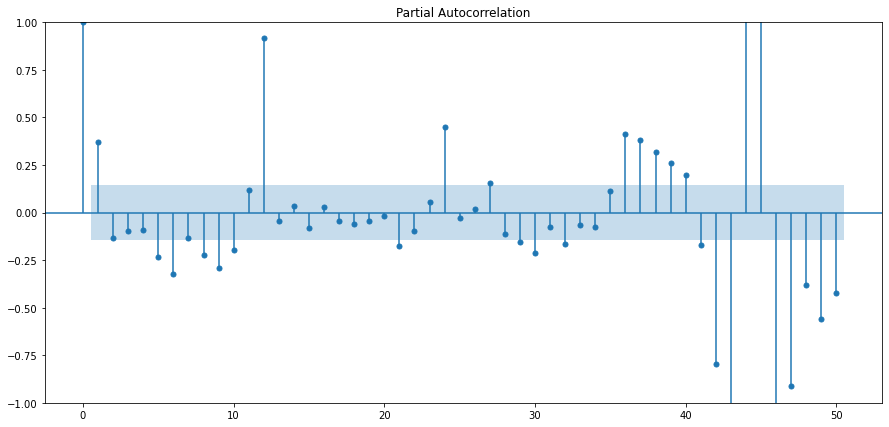

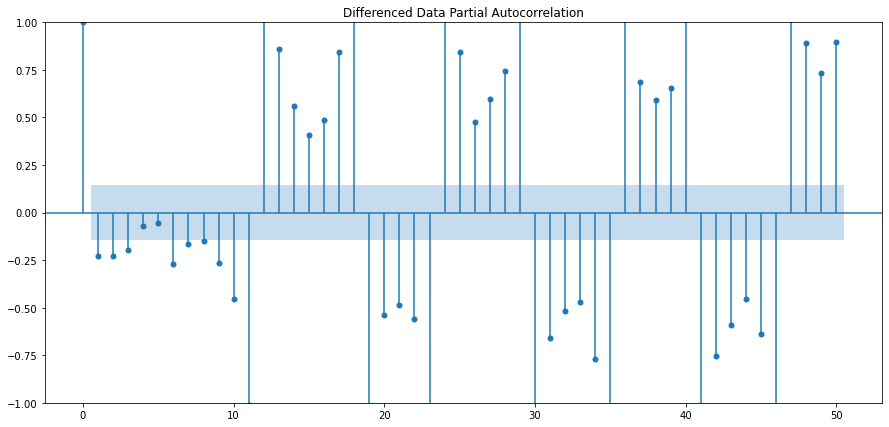

In [219]:
#PACF Plots
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [220]:
#For Rose

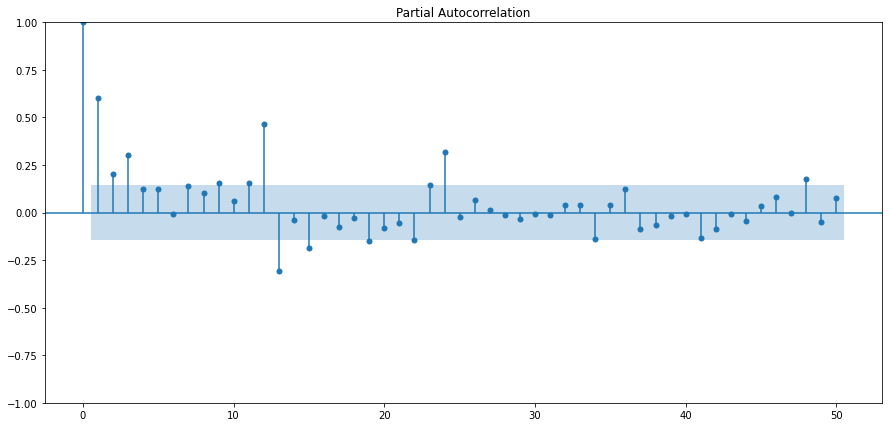

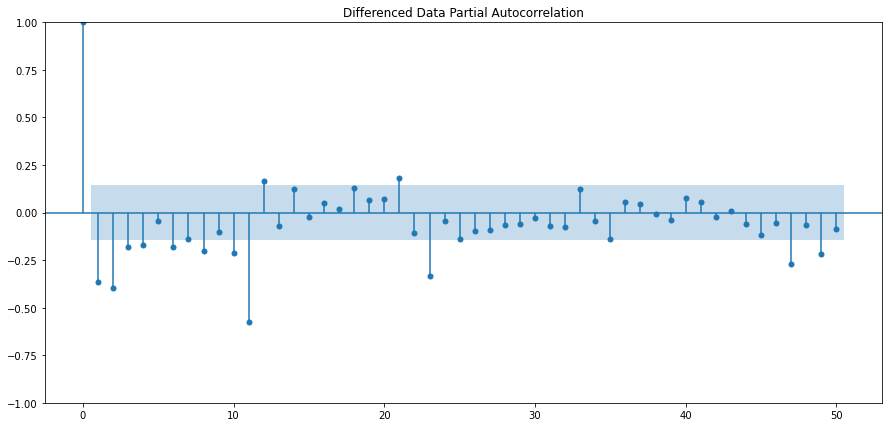

In [221]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

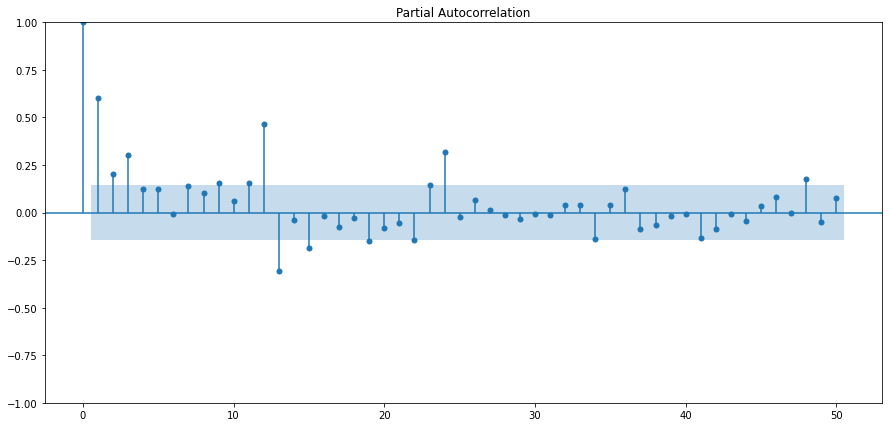

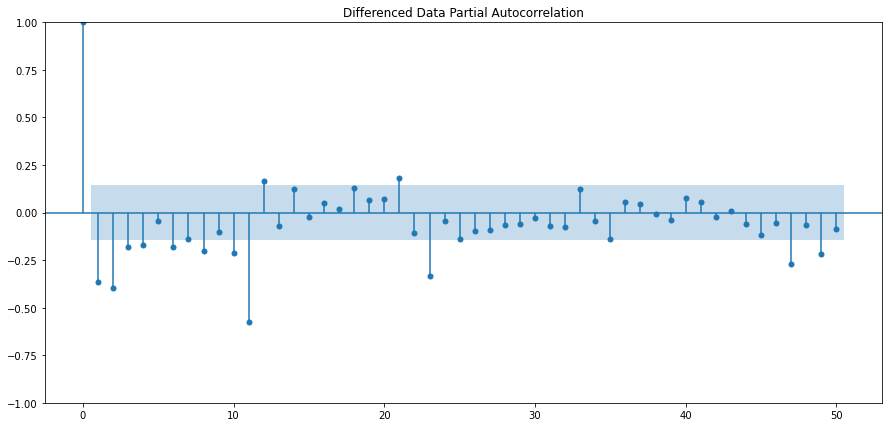

In [222]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

ARIMA MODEL - SPARKLING

In [223]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [224]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [225]:
from statsmodels.tsa.arima.model import ARIMA

In [226]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.5272004519366
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.50921703971


In [227]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509217
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [228]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                Sun, 11 Dec 2022   AIC                           2233.778
Time:                        19:31:54   BIC                           2245.278
Sample:                    01-31-1980   HQIC                          2238.451
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667     -1.499      0.1

Predict on the Test Set using this model and evaluate the model.

In [229]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [230]:
from sklearn.metrics import mean_squared_error

In [231]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

RMSE
ARIMA(2,1,1)  79.49852

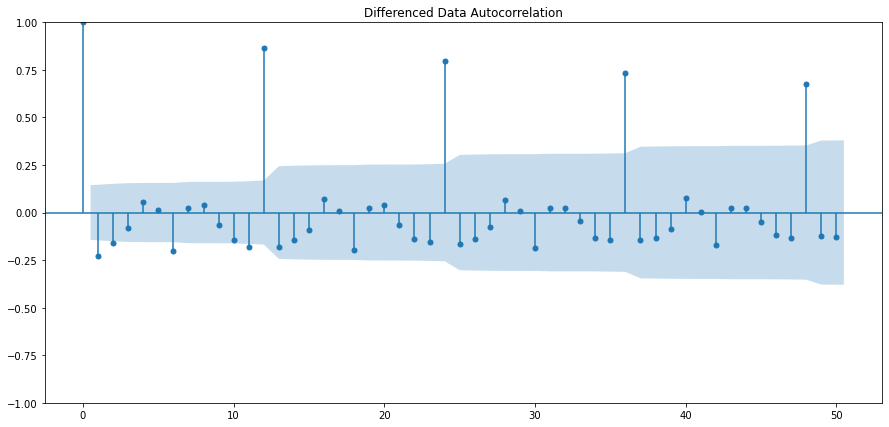

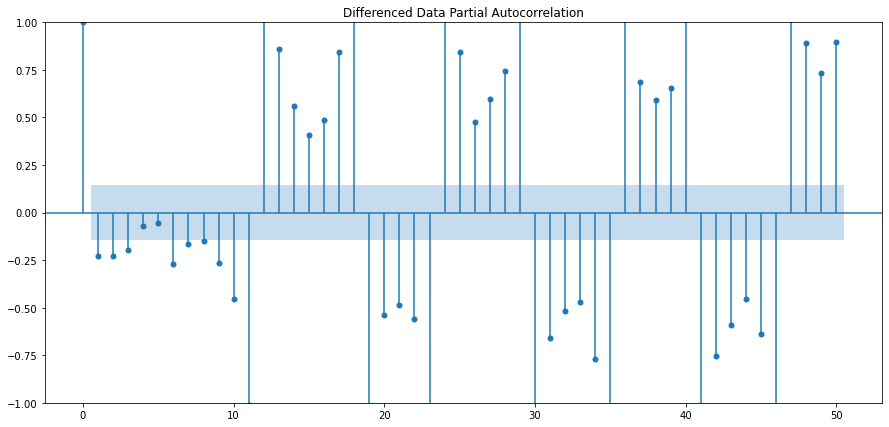

In [232]:
#Let us look at the ACF and the PACF plots once more.
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [233]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 11 Dec 2022   AIC                           2267.663
Time:                        19:31:55   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

In [234]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [235]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,1)  79.49852
ARIMA(0,1,0)  79.49852

For Rose

In [236]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [237]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [238]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168


In [239]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [240]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -636.754
Date:                Sun, 11 Dec 2022   AIC                           1281.508
Time:                        19:31:55   BIC                           1293.009
Sample:                    01-31-1980   HQIC                          1286.181
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1834      0.078      2.353      0.019       0.031       0.336
ar.L2         -0.0959      0.106     -0.907      0.364      -0.303       0.111
ma.L1         -0.9075      0.058    -15.663      0.0

In [241]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [242]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

RMSE
ARIMA(2,1,1)  79.49852

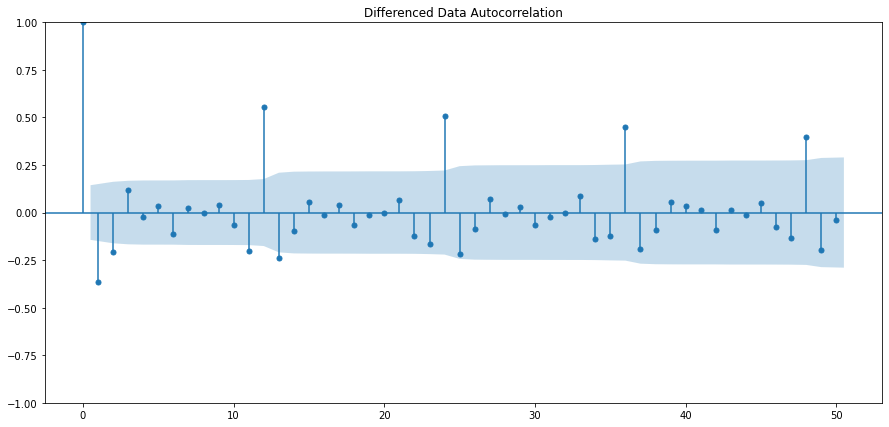

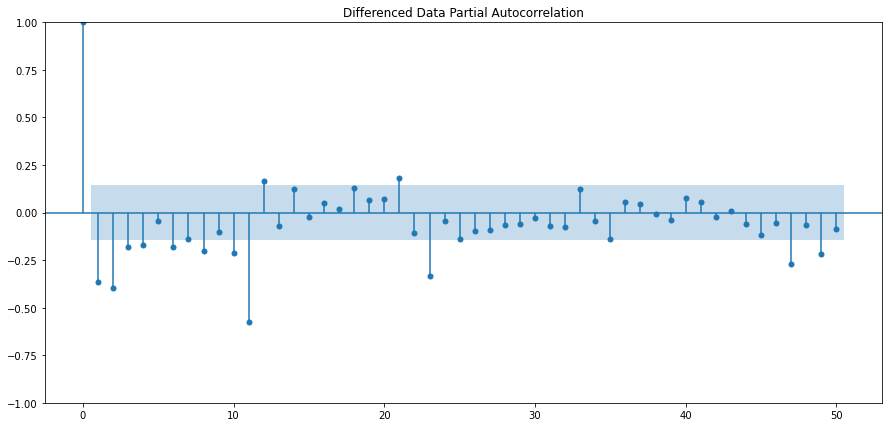

In [243]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [244]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.577
Date:                Sun, 11 Dec 2022   AIC                           1333.155
Time:                        19:31:56   BIC                           1336.030
Sample:                    01-31-1980   HQIC                          1334.323
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1515.6738    122.418     12.381      0.000    1275.740    1755.608
Ljung-Box (L1) (Q):                  17.11   Jarque-Bera (JB):                59.55
Prob(Q):                              0.00   Pr

In [245]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [246]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(2,1,1)  79.49852
ARIMA(0,1,0)  79.49852

SARIMA - SPARKLING

In [247]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

AUTO SARIMA on original data

In [248]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [249]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [250]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678781
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574253873
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:2971.3781834120573
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908182951
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307793
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3409.8776947986057
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866647
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553654667
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3470.1937190394965
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094346
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380278882
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3184.5990316223
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.656571982843
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.66392342301

SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.3724067255423
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388007272
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.9104199706937
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3442.165361090793
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.985406982297
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735494008
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183456624902
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3387.2530472810095
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082858
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483342050385
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597822039313
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3099.7680205815823
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930707127657
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.946732412375
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645085
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:3015.5546511608172
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644410918
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.120089247

In [251]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
179  (2, 1, 3)  (0, 1, 3, 12)    18.000000
255  (3, 1, 3)  (3, 1, 3, 12)    26.000000
63   (0, 1, 3)  (3, 1, 3, 12)   574.278105
127  (1, 1, 3)  (3, 1, 3, 12)  1160.442401
239  (3, 1, 2)  (3, 1, 3, 12)  1213.224309

In [252]:
SARIMA_AIC_spark.sort_values(by=['AIC']).tail()

param       seasonal          AIC
115  (1, 1, 3)  (0, 1, 3, 12)  5652.189093
47   (0, 1, 2)  (3, 1, 3, 12)  5726.935437
119  (1, 1, 3)  (1, 1, 3, 12)  6246.419934
183  (2, 1, 3)  (1, 1, 3, 12)  6247.967208
187  (2, 1, 3)  (2, 1, 3, 12)  6250.024820

In [253]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Sun, 11 Dec 2022   AIC                           1213.283
Time:                                     19:38:06   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.174      0.000      -1.959      -1.269
ar.L2         -0.6118      

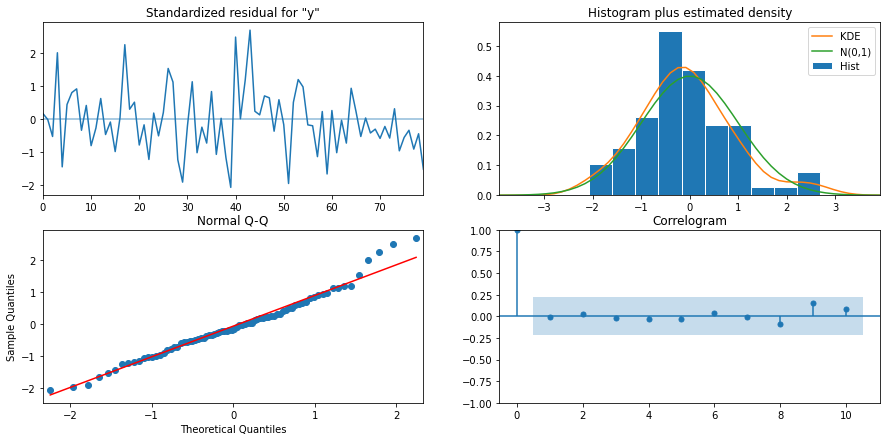

In [254]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()


In [255]:
SARIMA_test.head()

Sparkling  Rose
YearMonth                  
1991-01-31       1902  54.0
1991-02-28       2049  55.0
1991-03-31       1874  66.0
1991-04-30       1279  65.0
1991-05-31       1432  60.0

In [256]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [257]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [258]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.077632  431.184062     584.972401    2275.182863
1  1539.913915  458.427569     641.412390    2438.415440
2  1707.049969  460.196322     805.081751    2609.018187
3  1858.221977  466.776897     943.356070    2773.087883
4  1501.217479  467.073576     585.770092    2416.664866

In [259]:
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1430.077632
1991-02-28       2049  55.0       1539.913915
1991-03-31       1874  66.0       1707.049969
1991-04-30       1279  65.0       1858.221977
1991-05-31       1432  60.0       1501.217479

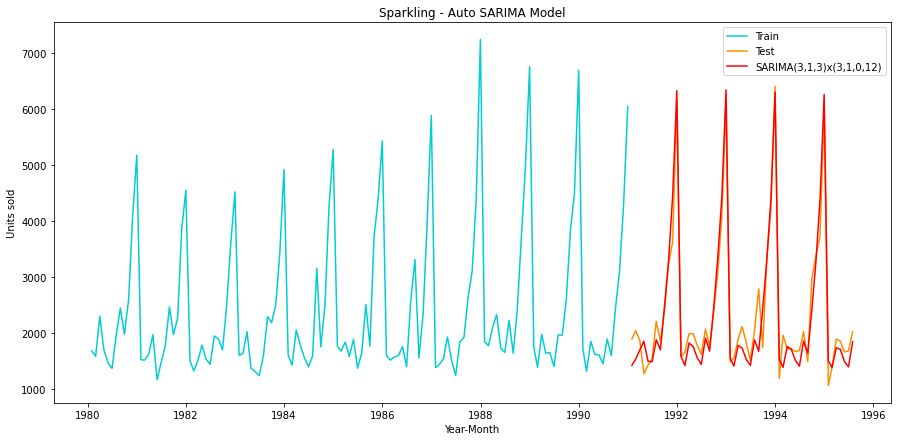

In [260]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [261]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.845 and MAPE is 10.35


In [262]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1316.034674      45.47
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35

AUTO SARIMA on Log(Sparkling)

In [263]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

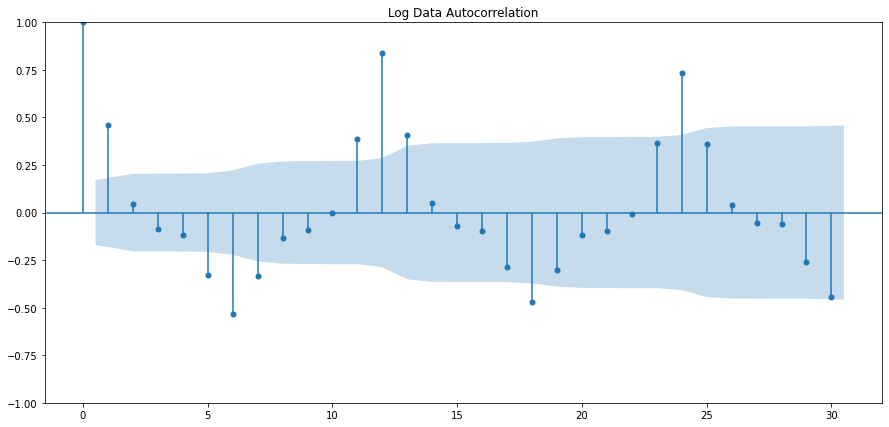

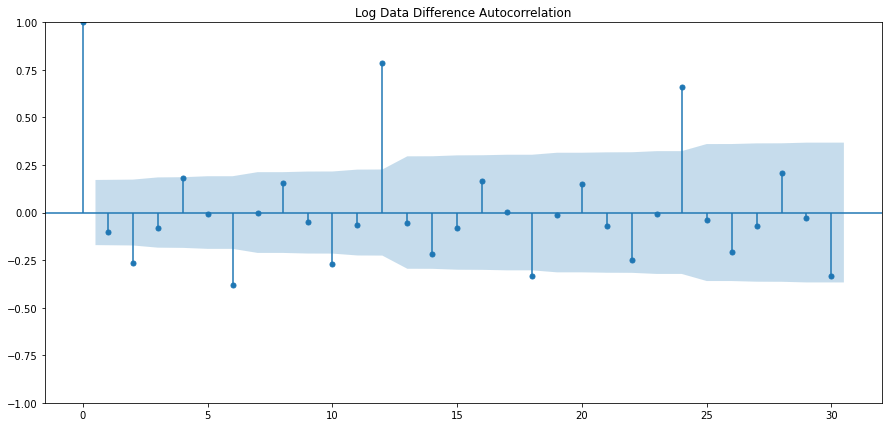

In [264]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

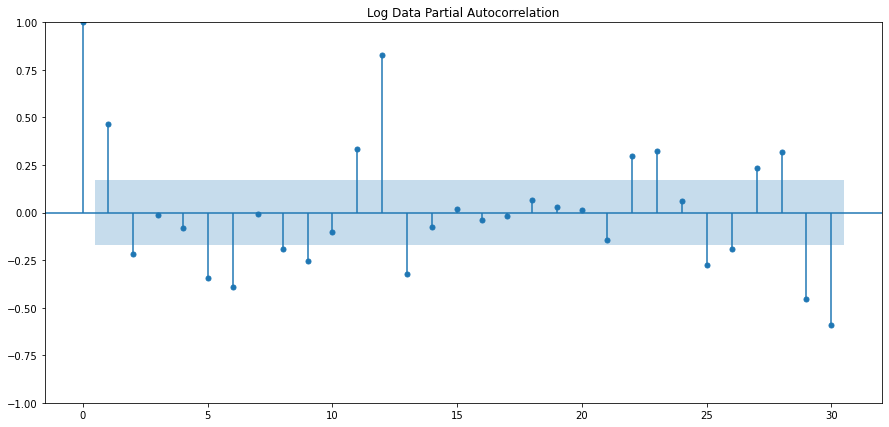

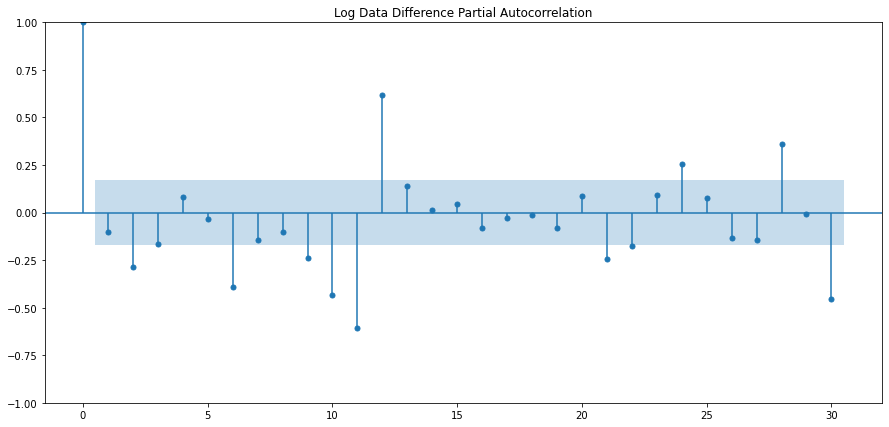

In [265]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12

In [266]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Some parameter combinations for Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Some parameter combinations for Model
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [267]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [268]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978429
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597535
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.2104083201695
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378254817689
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.190471849003
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328531943324
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576096999602
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889244535605
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200647
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.305803171067
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900296188908
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797542366342
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566714019668
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-

SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504386056426
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168142922774
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037387968634
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59664859957167
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805667607936
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.30874747541196
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803165030494
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.4094545430985
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33411481965422
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985385245358
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803527333767
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.956088003929
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.6535998433253
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.1020440512399
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45848875817634
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49382833776463
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.14887895979757


In [269]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611724
133  (2, 1, 1)  (1, 0, 1, 12) -278.288231

In [270]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Sun, 11 Dec 2022   AIC                           -284.472
Time:                                    19:39:25   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.859      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

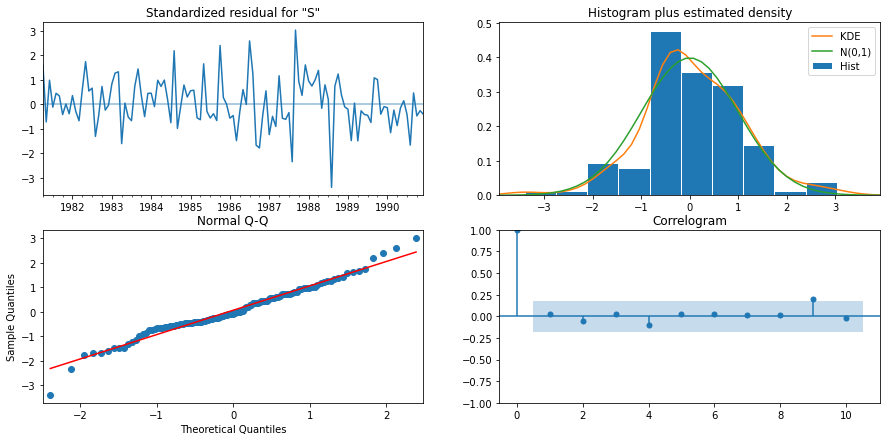

In [271]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [272]:
SARIMA_test.head()

Sparkling  Rose  spark_forecasted
YearMonth                                    
1991-01-31       1902  54.0       1430.077632
1991-02-28       2049  55.0       1539.913915
1991-03-31       1874  66.0       1707.049969
1991-04-30       1279  65.0       1858.221977
1991-05-31       1432  60.0       1501.217479

In [273]:
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [274]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [275]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212032  0.067110       3.080499       3.343566
1991-02-28  3.141304  0.067467       3.009071       3.273537
1991-03-31  3.256285  0.067823       3.123354       3.389215
1991-04-30  3.226729  0.068177       3.093105       3.360354
1991-05-31  3.195788  0.068529       3.061473       3.330103

In [276]:
spark_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted
YearMonth                                                          
1991-01-31       1902  54.0       1430.077632           1629.416820
1991-02-28       2049  55.0       1539.913915           1384.536565
1991-03-31       1874  66.0       1707.049969           1804.199682
1991-04-30       1279  65.0       1858.221977           1685.501401
1991-05-31       1432  60.0       1501.217479           1569.595791

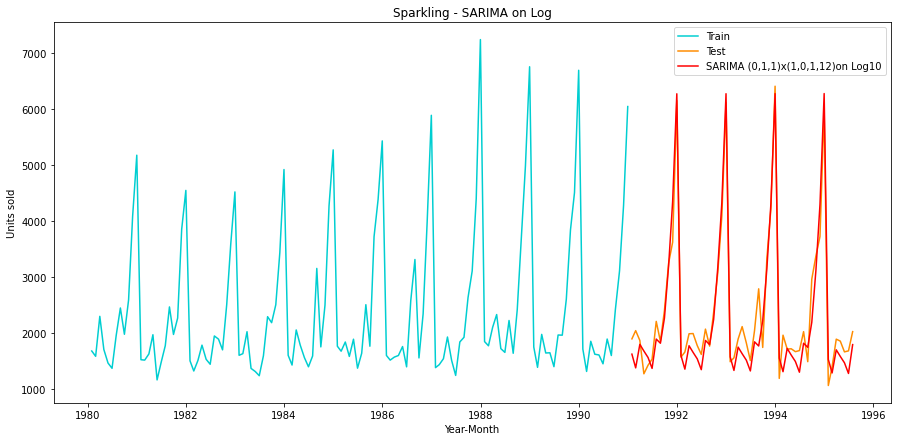

In [277]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [278]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.788 and MAPE is 11.18


In [279]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1316.034674      45.47
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.788142      11.18

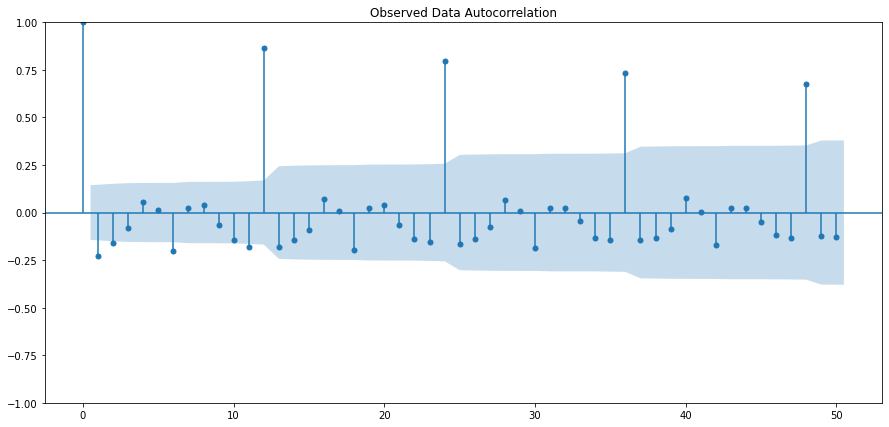

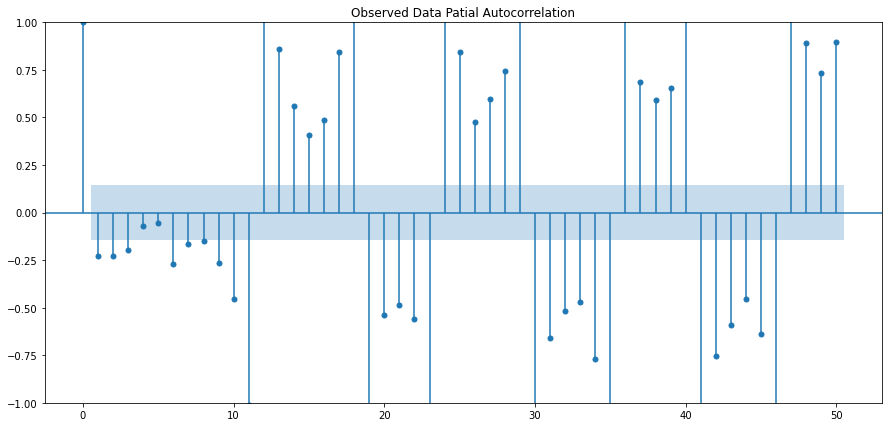

In [280]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

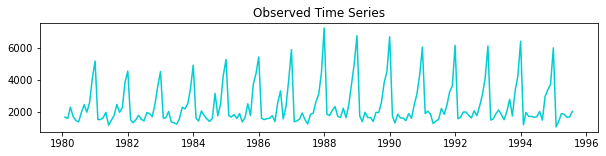

In [281]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

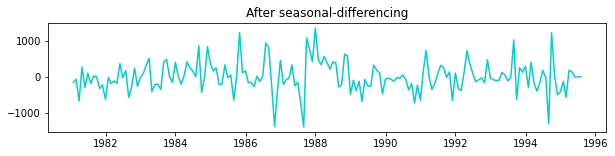

In [282]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

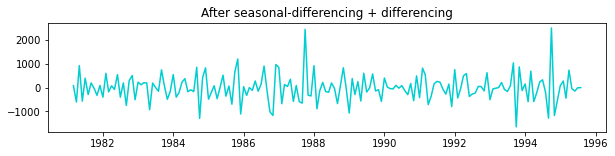

In [283]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

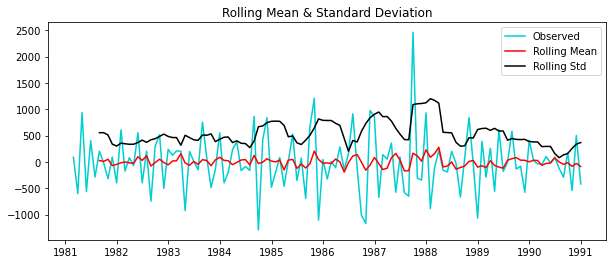

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [284]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

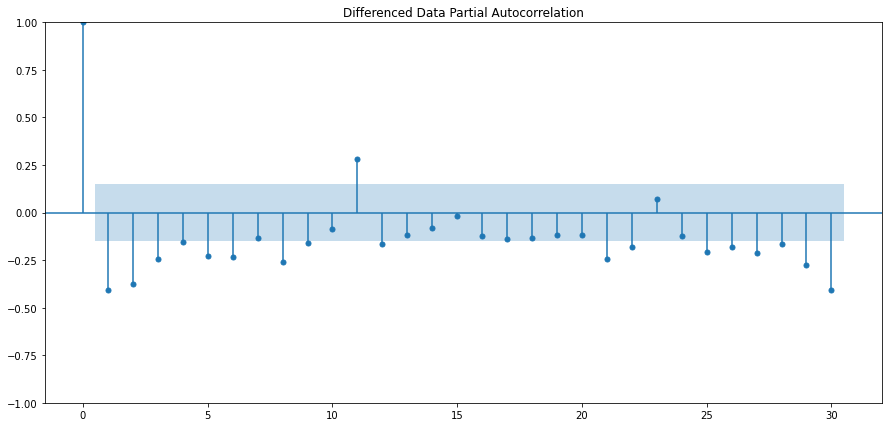

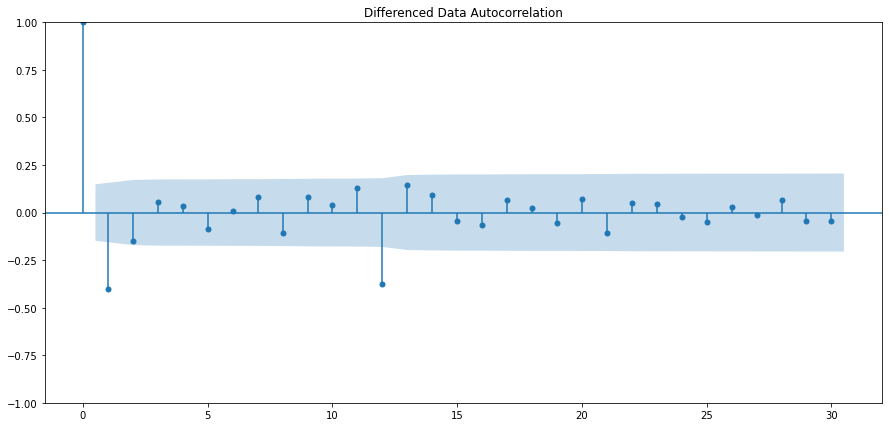

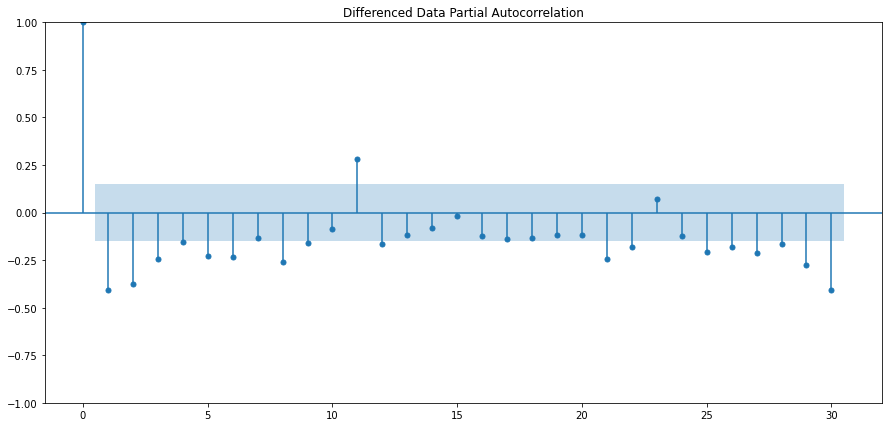

In [285]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation')

In [286]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())
print("Model Summary-SARIMA (3,1,3)X(3,1,0,12)")

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Sun, 11 Dec 2022   AIC                           1403.394
Time:                                         19:39:29   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

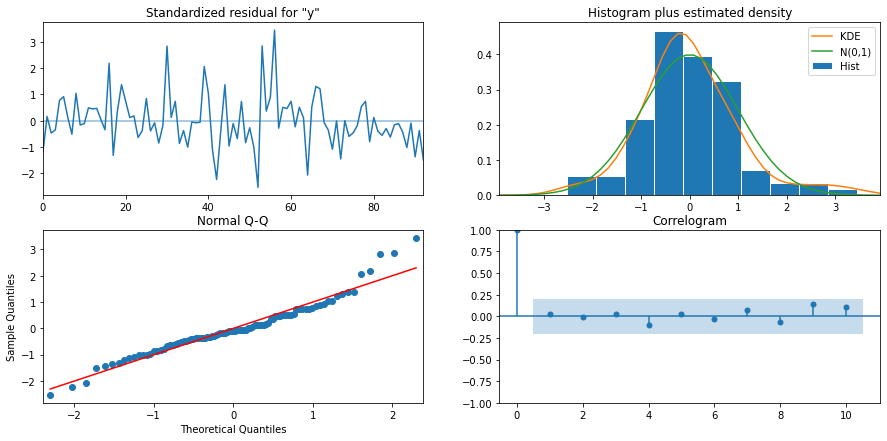

In [287]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [288]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [289]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [290]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.911945  416.594674     763.401389    2396.422502
1  1419.157708  429.114147     578.109435    2260.205982
2  1868.147821  429.104787    1027.117892    2709.177750
3  1731.475379  430.973358     886.783118    2576.167640
4  1659.825953  431.906299     813.305162    2506.346744

In [291]:
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.077632           1629.416820   
1991-02-28       2049  55.0       1539.913915           1384.536565   
1991-03-31       1874  66.0       1707.049969           1804.199682   
1991-04-30       1279  65.0       1858.221977           1685.501401   
1991-05-31       1432  60.0       1501.217479           1569.595791   

            spark_manual_forecasted  
YearMonth                            
1991-01-31              1579.911945  
1991-02-28              1419.157708  
1991-03-31              1868.147821  
1991-04-30              1731.475379  
1991-05-31              1659.825953

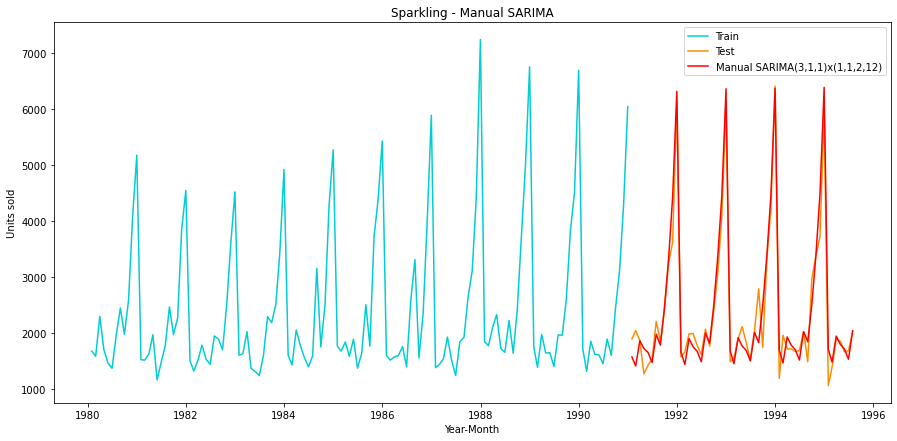

In [292]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [293]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.108 and MAPE is 9.48


In [294]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1316.034674      45.47
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.788142      11.18
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48

Model 8 - SARIMA on ROSE Wine

In [295]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [296]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [297]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301628343
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776008
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:1881.1063358323363
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658806
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601616
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654778
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:4175.130113475896
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729143804
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244225685
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3476.2761890708407
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739765
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246489413
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713393916
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3397.828295502391
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133561898
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717835
SARIMA

SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001392128
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3619.0690082588617
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.894075393374
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928010053947
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.833567404046
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:5825.7465233392195
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386754133409
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965332706663
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.9098665834756
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3381.1366573737405
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964822606
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130508003
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409655156949
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:1704.7782163670854
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705667749563
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932806186799
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8280727203738
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3323.8390315139077
SARIMA

In [298]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal   AIC
91   (1, 1, 1)  (2, 1, 3, 12)  16.0
43   (0, 1, 2)  (2, 1, 3, 12)  16.0
59   (0, 1, 3)  (2, 1, 3, 12)  18.0
123  (1, 1, 3)  (2, 1, 3, 12)  20.0
191  (2, 1, 3)  (3, 1, 3, 12)  24.0

In [299]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sun, 11 Dec 2022   AIC                            681.363
Time:                                    19:46:15   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

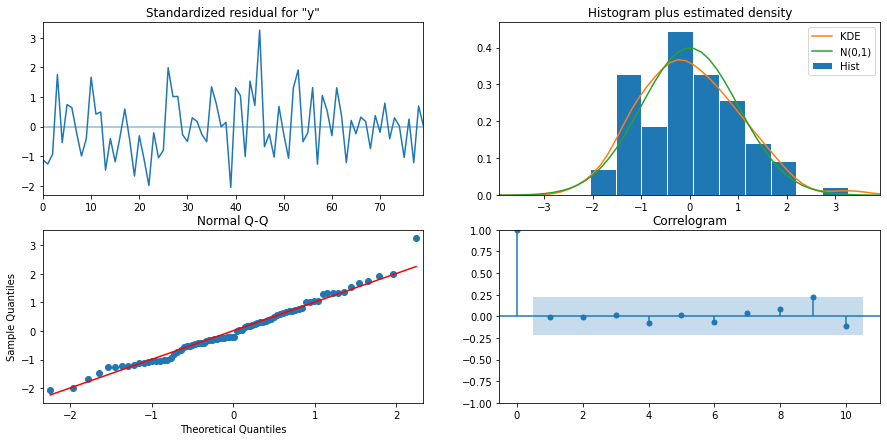

In [300]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [301]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [302]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [303]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.227190  14.458651      16.888755      73.565626
1  63.055523  14.503591      34.629007      91.482038
2  68.117939  14.453658      39.789290      96.446588
3  61.826872  14.449902      33.505584      90.148160
4  68.436819  14.470419      40.075318      96.798320

In [304]:
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.077632           1629.416820   
1991-02-28       2049  55.0       1539.913915           1384.536565   
1991-03-31       1874  66.0       1707.049969           1804.199682   
1991-04-30       1279  65.0       1858.221977           1685.501401   
1991-05-31       1432  60.0       1501.217479           1569.595791   

            spark_manual_forecasted  rose_auto_forecasted  
YearMonth                                                  
1991-01-31              1579.911945             45.227190  
1991-02-28              1419.157708             63.055523  
1991-03-31              1868.147821             68.117939  
1991-04-30              1731.475379             61.826872  
1991-05-31              1659.825953             68.436819

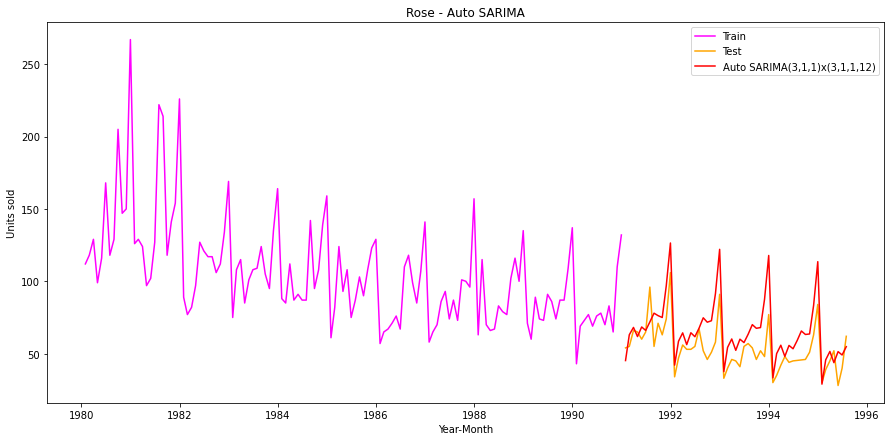

In [305]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [306]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.824 and MAPE is 25.48


In [307]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time                       15.268885      22.82
NaiveModel                               79.718559     145.10
SimpleAverage                            53.460350      94.93
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.017, Beta 3.23               38.281319      66.37
DES Alpha 0.10, Beta 0.10                37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48

AUTO SARIMA ON LOG(ROSE)

In [308]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [309]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [310]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [311]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.7976958405474
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.02210408794159
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.8690585880142
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.3075306777531
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.3749101416423
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250245
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.1702810320842
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.14453238475608
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.00182479539552
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380296215855
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.50588474768676
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.48304581147525
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.82265374355543
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.65277021840595
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.4914449429843
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.4992577135315
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-199.

SARIMA(1, 0, 2)x(0, 0, 1, 12)7 - AIC:-201.09051928522234
SARIMA(1, 0, 2)x(0, 0, 2, 12)7 - AIC:-194.6541064529312
SARIMA(1, 0, 2)x(0, 1, 0, 12)7 - AIC:-203.80790769712195
SARIMA(1, 0, 2)x(0, 1, 1, 12)7 - AIC:-247.73417929106074
SARIMA(1, 0, 2)x(0, 1, 2, 12)7 - AIC:-217.33047586142047
SARIMA(1, 0, 2)x(1, 0, 0, 12)7 - AIC:-211.20780955167643
SARIMA(1, 0, 2)x(1, 0, 1, 12)7 - AIC:-248.70821415639648
SARIMA(1, 0, 2)x(1, 0, 2, 12)7 - AIC:-229.79517722602944
SARIMA(1, 0, 2)x(1, 1, 0, 12)7 - AIC:-233.73510356792525
SARIMA(1, 0, 2)x(1, 1, 1, 12)7 - AIC:-231.3156132652271
SARIMA(1, 0, 2)x(1, 1, 2, 12)7 - AIC:-216.31979793797805
SARIMA(1, 0, 2)x(2, 0, 0, 12)7 - AIC:-236.5256733707247
SARIMA(1, 0, 2)x(2, 0, 1, 12)7 - AIC:-238.65122079790413
SARIMA(1, 0, 2)x(2, 0, 2, 12)7 - AIC:-238.08418909347344
SARIMA(1, 0, 2)x(2, 1, 0, 12)7 - AIC:-211.61713802735073
SARIMA(1, 0, 2)x(2, 1, 1, 12)7 - AIC:-212.1394948770883
SARIMA(1, 0, 2)x(2, 1, 2, 12)7 - AIC:-212.99494160430078
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AI

SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611383216409
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973871337386
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373745302862
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24003159318212
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.05002194416488
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.47194010405724
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25690132070199
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96973869715188
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91674464955582
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.05787939853704
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221069968388
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212653807958
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.3304756923933
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.1047008843288
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566480150597
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.35093892364358
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757665108657
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - 

In [312]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620750
7    (0, 0, 0)  (1, 0, 1, 12) -256.170281
133  (1, 0, 1)  (1, 0, 1, 12) -255.482061
25   (0, 0, 1)  (1, 0, 1, 12) -254.978845
223  (2, 0, 0)  (1, 0, 1, 12) -253.620650

In [313]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 132.810
Date:                              Sun, 11 Dec 2022   AIC                           -257.621
Time:                                      19:49:13   BIC                           -246.504
Sample:                                  01-31-1980   HQIC                          -253.107
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.078      2.179      0.029       0.017       0.321
ar.S.L12       0.98

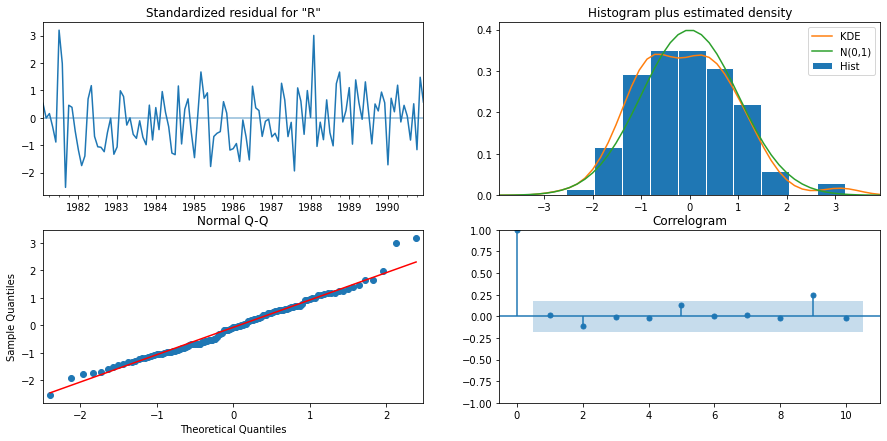

In [314]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [315]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [316]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [317]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727943  0.073893       1.583114       1.872771
1991-02-28  1.787594  0.074680       1.641224       1.933964
1991-03-31  1.820439  0.074702       1.674025       1.966853
1991-04-30  1.780349  0.074703       1.633933       1.926764
1991-05-31  1.811708  0.074703       1.665293       1.958124

In [318]:
rose_log_forecasted = pred_dynamic.predicted_mean

SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.077632           1629.416820   
1991-02-28       2049  55.0       1539.913915           1384.536565   
1991-03-31       1874  66.0       1707.049969           1804.199682   
1991-04-30       1279  65.0       1858.221977           1685.501401   
1991-05-31       1432  60.0       1501.217479           1569.595791   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.911945             45.227190   
1991-02-28              1419.157708             63.055523   
1991-03-31              1868.147821             68.117939   
1991-04-30              1731.475379             61.826872   
1991-05-31              1659.825953             68.436819   

            rose_log_auto_forecasted  
YearMonth                             
1991-01-31                 53.449380  
1991-02-28                 61.318803  
1991-03-31                 66.136158  
1991-04-30                 60.304332  
1991-05-31                 64.819914

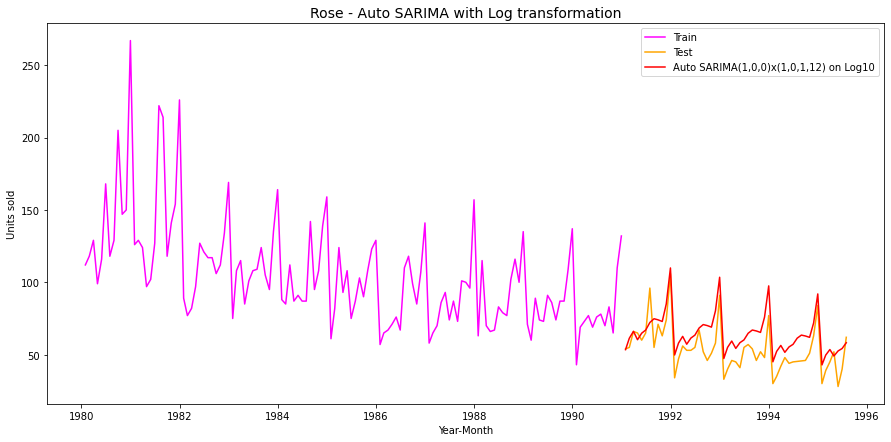

In [319]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)
plt.legend(loc='best')

In [320]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.591 and MAPE is 21.92


In [321]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])
rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time                       15.268885      22.82
NaiveModel                               79.718559     145.10
SimpleAverage                            53.460350      94.93
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.017, Beta 3.23               38.281319      66.37
DES Alpha 0.10, Beta 0.10                37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92

Manual SARIMA on Rose Wine

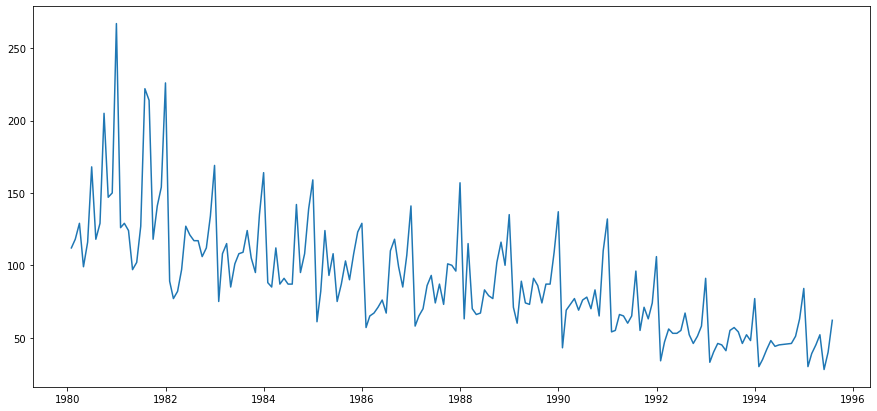

In [322]:
plt.figure(figsize=(15,7))
plt.plot(df['Rose'])

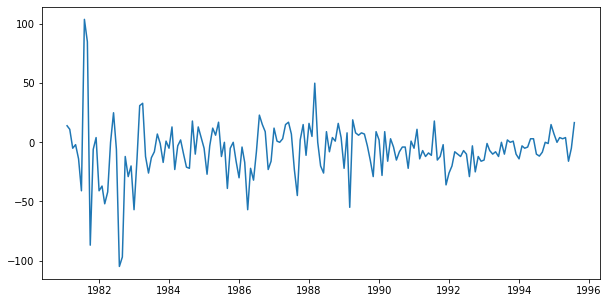

In [323]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())

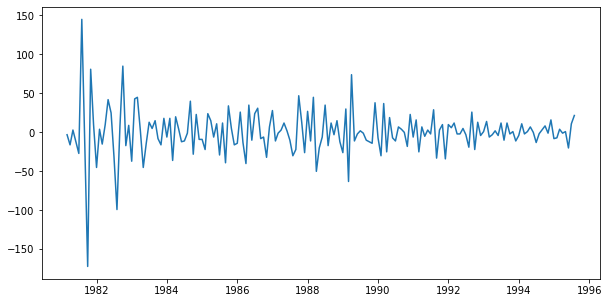

In [324]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

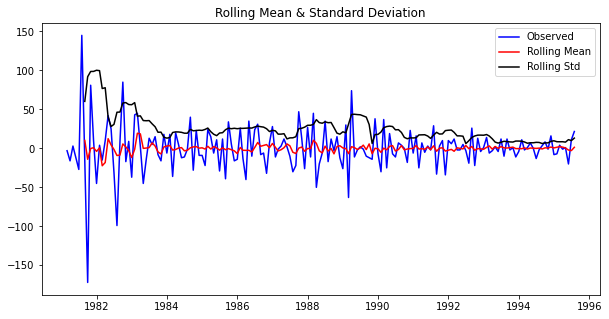

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [325]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

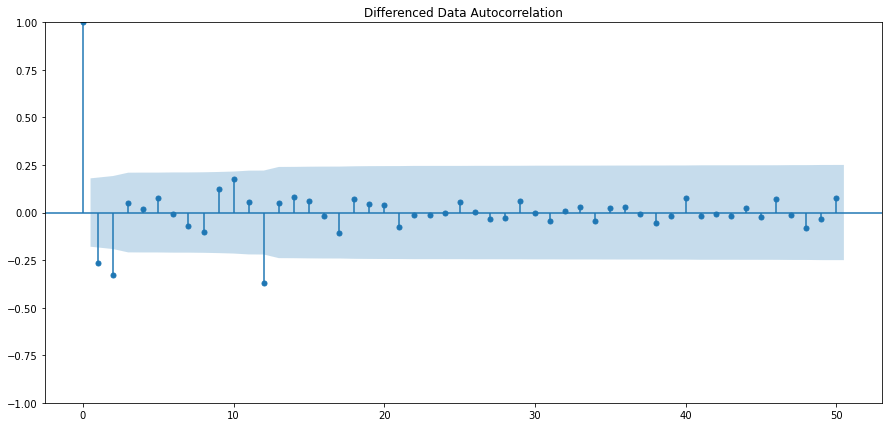

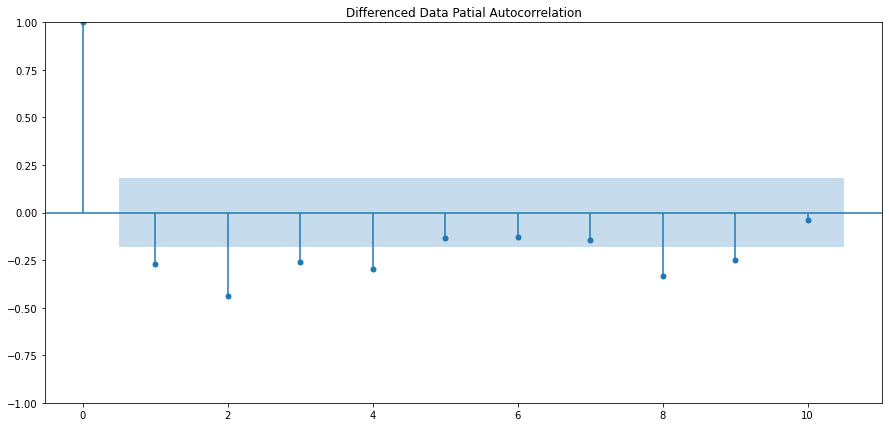

In [326]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [327]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 11 Dec 2022   AIC                            786.737
Time:                                    19:49:15   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

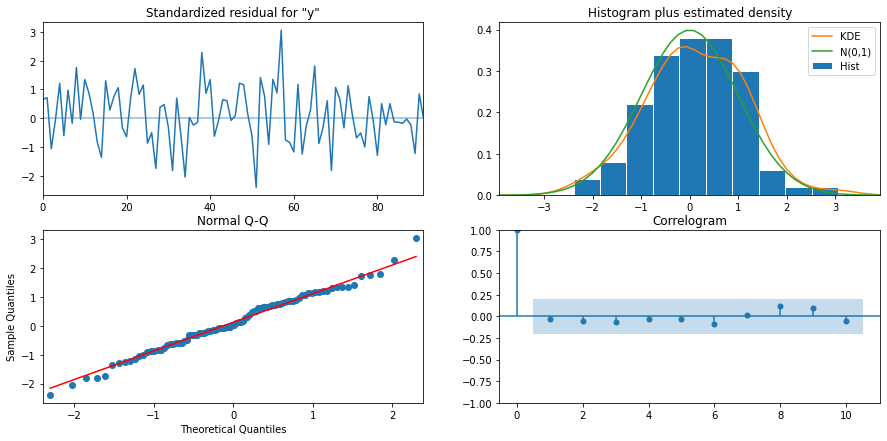

In [328]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [329]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [330]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [331]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250375      75.215706
1  64.208694  16.000767      32.847766      95.569621
2  65.110689  16.074606      33.605041      96.616338
3  68.453063  16.150996      36.797693     100.108433
4  61.423433  16.154556      29.761086      93.085781

In [332]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.077632           1629.416820   
1991-02-28       2049  55.0       1539.913915           1384.536565   
1991-03-31       1874  66.0       1707.049969           1804.199682   
1991-04-30       1279  65.0       1858.221977           1685.501401   
1991-05-31       1432  60.0       1501.217479           1569.595791   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.911945             45.227190   
1991-02-28              1419.157708             63.055523   
1991-03-31              1868.147821             68.117939   
1991-04-30              1731.475379             61.826872   
1991-05-31              1659.825953             68.436819   

            rose_log_auto_forecasted  rose_manual_forecasted  
YearMonth                                                     
1991-01-31                 53.449380               44.733041  
1991-02-28                 61.318803               64.208694  
1991-03-31                 66.136158               65.110689  
1991-04-30                 60.304332               68.453063  
1991-05-31                 64.819914               61.423433

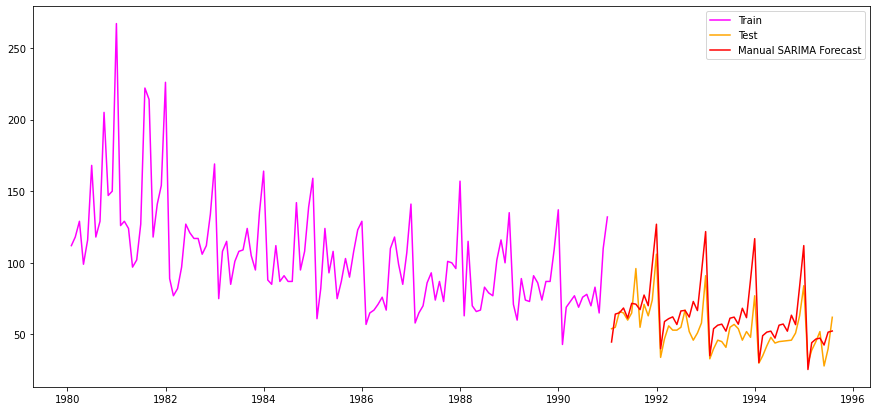

In [333]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')
plt.legend(loc='best')

In [334]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [335]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])
rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time                       15.268885      22.82
NaiveModel                               79.718559     145.10
SimpleAverage                            53.460350      94.93
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.017, Beta 3.23               38.281319      66.37
DES Alpha 0.10, Beta 0.10                37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)          15.377144      22.16

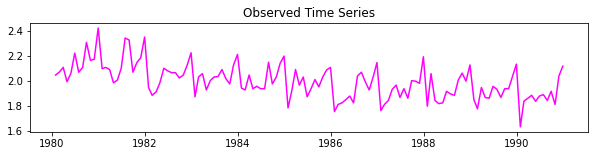

In [336]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')
plt.title ('Observed Time Series');

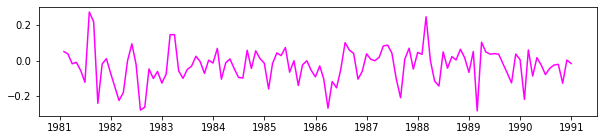

In [337]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')

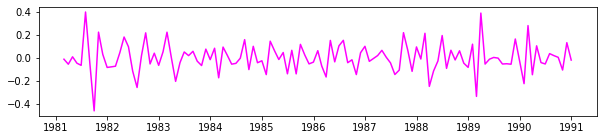

In [338]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')

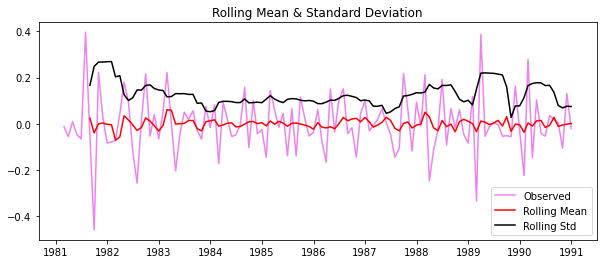

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [339]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet')

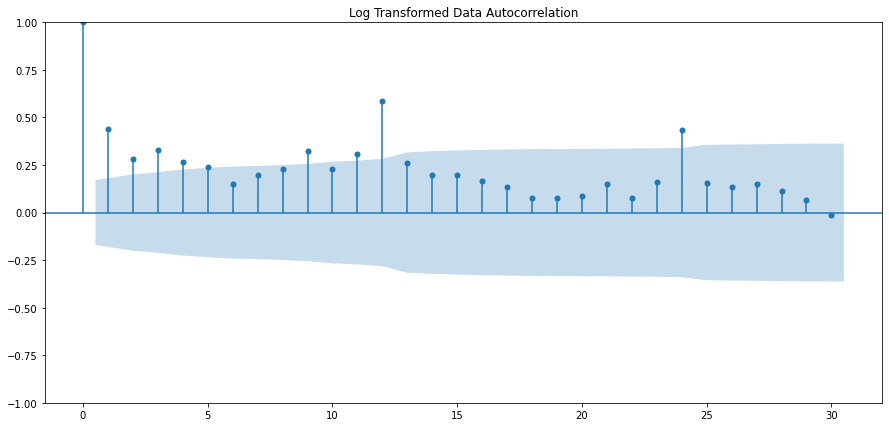

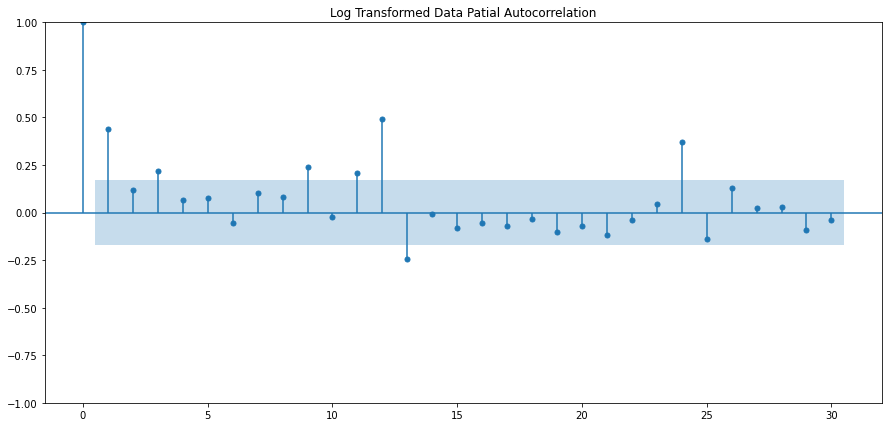

In [340]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

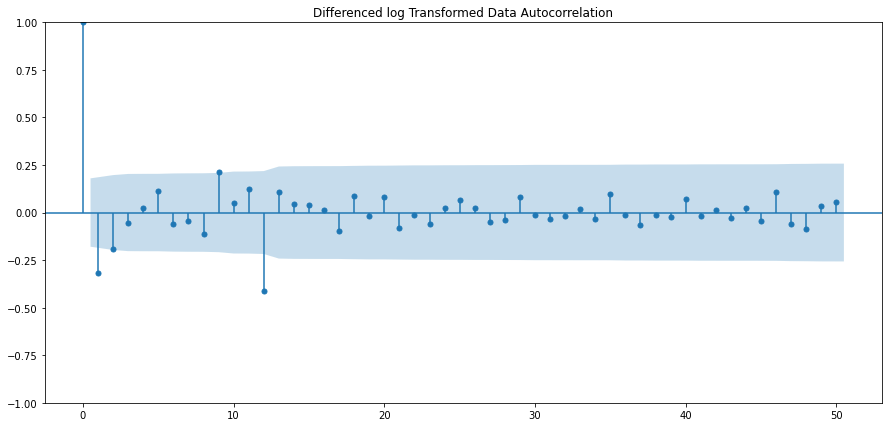

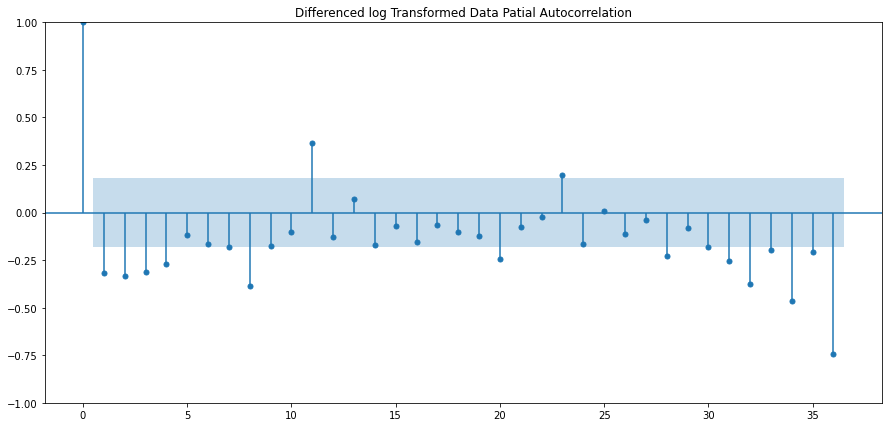

In [341]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [342]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Sun, 11 Dec 2022   AIC                           -243.528
Time:                                    19:49:18   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0015      0.118     -0.012      0.990      -0.232       0.229
ar.L2         -0.1554      0.126   

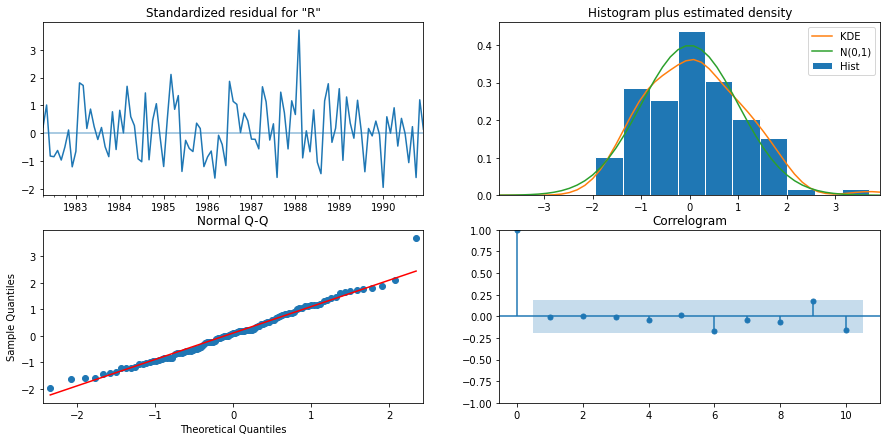

In [343]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [344]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [345]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [346]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721072  0.067173       1.589416       1.852728
1991-02-28  1.789042  0.067977       1.655810       1.922273
1991-03-31  1.811225  0.067974       1.677998       1.944452
1991-04-30  1.786823  0.067997       1.653552       1.920094
1991-05-31  1.820847  0.067842       1.687880       1.953814

In [347]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Sparkling  Rose  spark_forecasted  spark_log_forecasted  \
YearMonth                                                             
1991-01-31       1902  54.0       1430.077632           1629.416820   
1991-02-28       2049  55.0       1539.913915           1384.536565   
1991-03-31       1874  66.0       1707.049969           1804.199682   
1991-04-30       1279  65.0       1858.221977           1685.501401   
1991-05-31       1432  60.0       1501.217479           1569.595791   

            spark_manual_forecasted  rose_auto_forecasted  \
YearMonth                                                   
1991-01-31              1579.911945             45.227190   
1991-02-28              1419.157708             63.055523   
1991-03-31              1868.147821             68.117939   
1991-04-30              1731.475379             61.826872   
1991-05-31              1659.825953             68.436819   

            rose_log_auto_forecasted  rose_manual_forecasted  \
YearMonth                                                      
1991-01-31                 53.449380               44.733041   
1991-02-28                 61.318803               64.208694   
1991-03-31                 66.136158               65.110689   
1991-04-30                 60.304332               68.453063   
1991-05-31                 64.819914               61.423433   

            rose_log_manual_forecasted  
YearMonth                               
1991-01-31                   52.610450  
1991-02-28                   61.523623  
1991-03-31                   64.747780  
1991-04-30                   61.210137  
1991-05-31                   66.198388

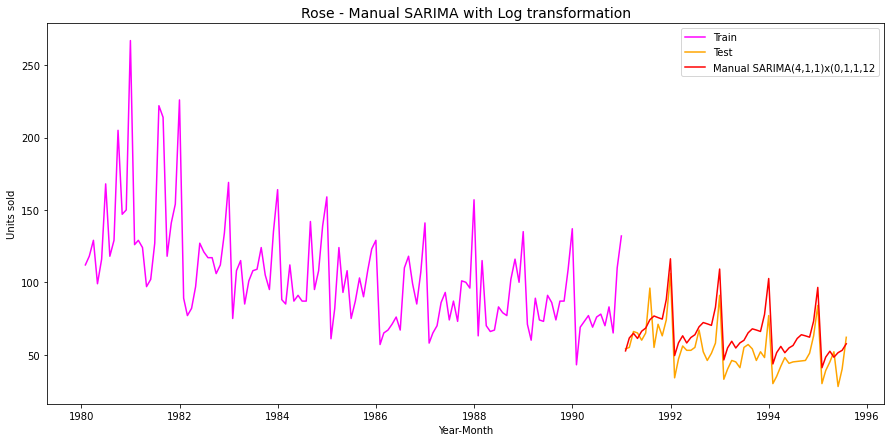

In [348]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)
plt.legend(loc='best')

In [349]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.177 and MAPE is 23.10


In [350]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])
rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
Regression On Time                       15.268885      22.82
NaiveModel                               79.718559     145.10
SimpleAverage                            53.460350      94.93
2 point TMA                              11.529278      13.54
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.017, Beta 3.23               38.281319      66.37
DES Alpha 0.10, Beta 0.10                37.056912      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)          15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10    14.176641      23.10

In [351]:
#Sorting the results from all the models
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
2 point TMA                              11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10    14.176641      23.10
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
Regression On Time                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)          15.377144      22.16
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.10, Beta 0.10                37.056912      64.02
DES Alpha 0.017, Beta 3.23               38.281319      66.37
SimpleAverage                            53.460350      94.93
NaiveModel                               79.718559     145.10

In [352]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
Regression On Time                      1389.135175      50.15
NaiveModel                              3864.279352     152.87
SimpleAverage                           1275.081804      38.90
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
6 point TMA                             1283.927428      43.86
9 point TMA                             1346.278315      46.86
SES Alpha 0.00                          1316.034674      45.47
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.788142      11.18
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48

Sparkling Wine

In [353]:
#Sorting the results from all the models
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.788142      11.18
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1316.034674      45.47
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

In [354]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48
Manual SARIMA(3,1,1)x(1,1,2,12)          324.107783       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)            331.845160      10.35
TES Alpha 0.4, Beta 0.1, Gamma 0.2       314.742310      10.38
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10      336.788142      11.18
TES Alpha 0.11, Beta 0.04, Gamma 0.036   406.510170      14.02
2 point TMA                              813.400684      19.70
4 point TMA                             1156.589694      35.96
SimpleAverage                           1275.081804      38.90
6 point TMA                             1283.927428      43.86
SES Alpha 0.00                          1316.034674      45.47
9 point TMA                             1346.278315      46.86
Regression On Time                      1389.135175      50.15
DES Alpha 0.1,Beta 0.1                  1779.420000      67.23
DES Alpha 0.6,Beta 0.0                  2007.238526      68.23
NaiveModel                              3864.279352     152.87

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

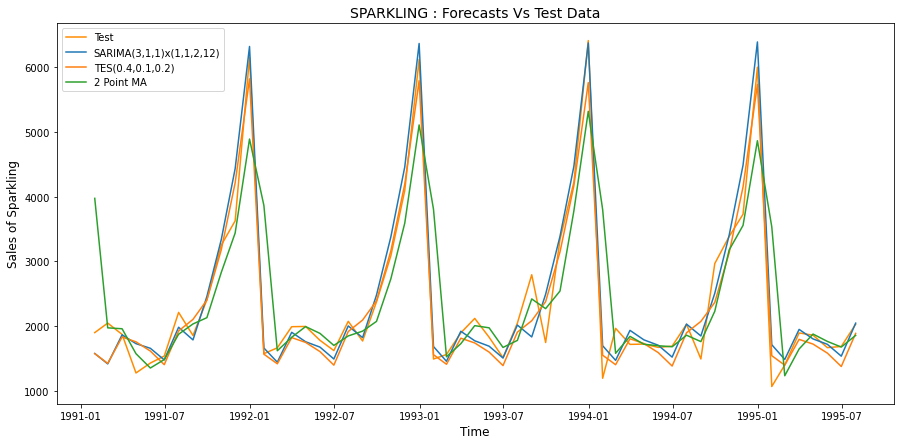

In [355]:
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')
#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(1,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

Building model on all of the dataset using best model, which is TES

In [356]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [357]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.775 and MAPE is 11.29


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

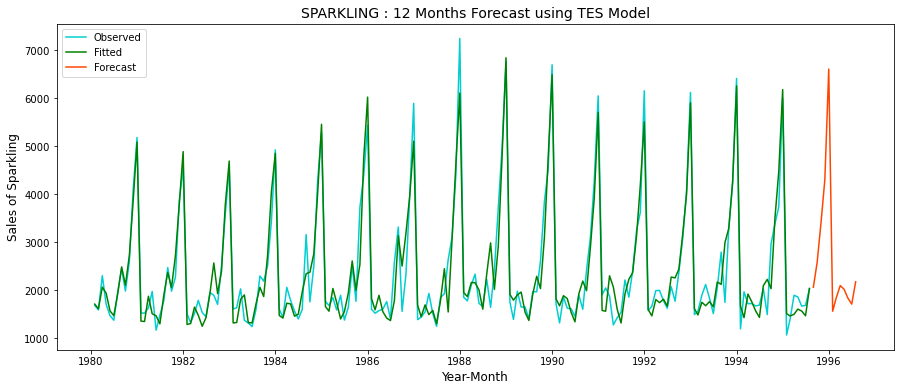

In [358]:
plt.figure(figsize=(15,6))
plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

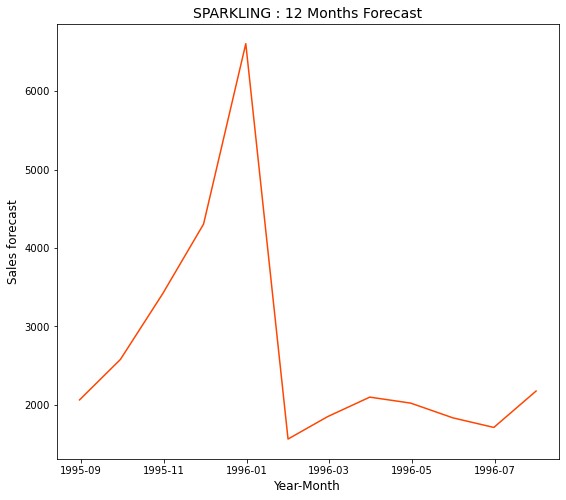

In [359]:
plt.figure(figsize=(9,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [360]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Sun, 11 Dec 2022   AIC                           2176.875
Time:                                         19:49:27   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4230      0.086     -4.916      0.000      -0.592      -0

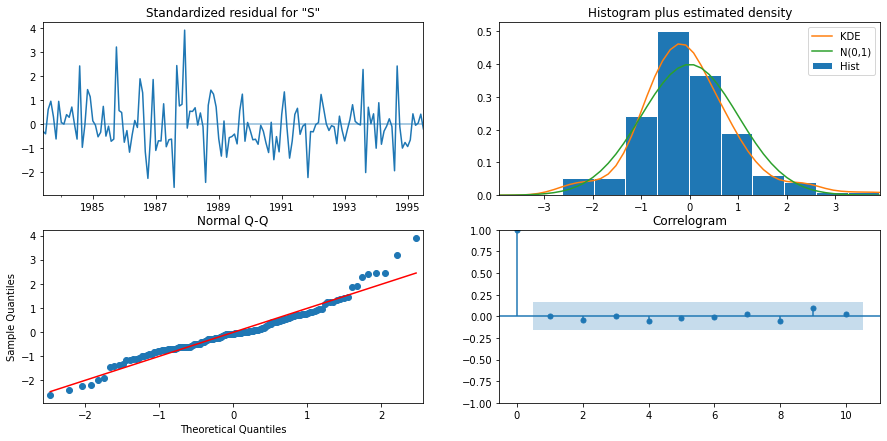

In [361]:
rcParams['figure.figsize'] = 15,7
results_full_data_model_spark.plot_diagnostics();

In [362]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [363]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.503338  384.489707    1119.917360    2627.089316
1995-09-30  2444.943200  389.494841    1681.547340    3208.339060
1995-10-31  3312.740576  390.188416    2547.985333    4077.495820
1995-11-30  3994.702249  390.697235    3228.949739    4760.454759
1995-12-31  6084.242097  390.827008    5318.235238    6850.248956

In [364]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.254 and MAPE is 14.86


In [365]:
df.tail()

Sparkling  Rose
YearMonth                  
1995-03-31       1897  45.0
1995-04-30       1862  52.0
1995-05-31       1670  28.0
1995-06-30       1688  40.0
1995-07-31       2031  62.0

In [366]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

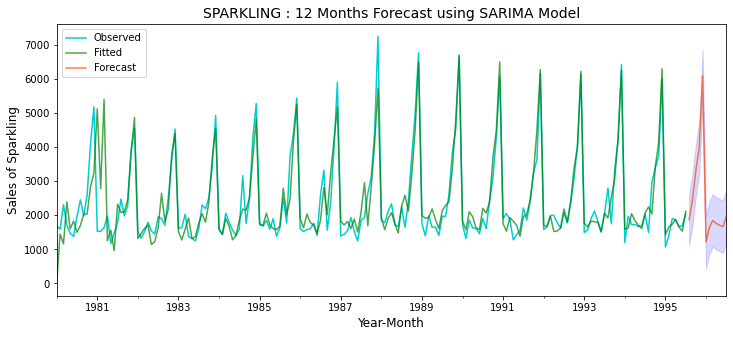

In [367]:
plt.figure(figsize=(12,5))
axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

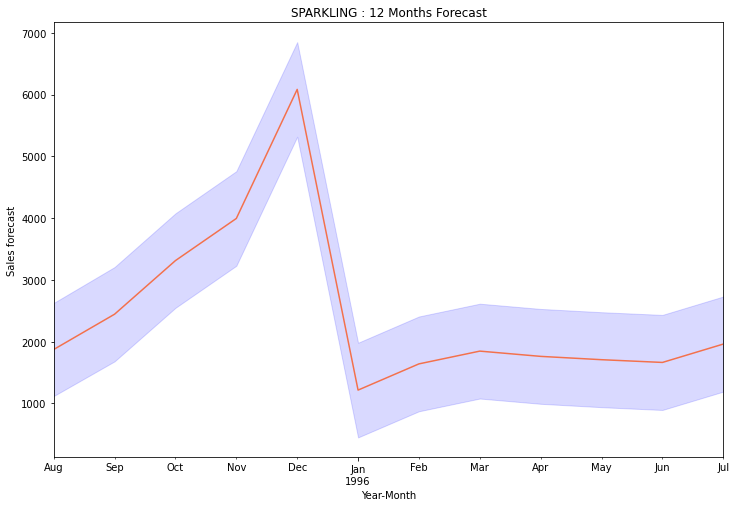

In [368]:
plt.figure(figsize=(12,8))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [369]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.50
1995-09-30    2444.94
1995-10-31    3312.74
1995-11-30    3994.70
1995-12-31    6084.24
1996-01-31    1216.26
1996-02-29    1640.67
1996-03-31    1847.29
1996-04-30    1762.18
1996-05-31    1708.41
1996-06-30    1663.96
1996-07-31    1961.44

In [370]:
np.sum(forecast['Sparkling'])

29510.329999999998

In [371]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.194167
std    1384.638872
min    1216.260000
25%    1697.297500
50%    1860.395000
75%    2661.890000
max    6084.240000

For Rose Wine

In [372]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
2 point TMA                              11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10    14.176641      23.10
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
Regression On Time                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)          15.377144      22.16
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.10, Beta 0.10                37.056912      64.02
DES Alpha 0.017, Beta 3.23               38.281319      66.37
SimpleAverage                            53.460350      94.93
NaiveModel                               79.718559     145.10

In [373]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                              11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.1        9.493828      13.68
4 point TMA                              14.451364      19.49
6 point TMA                              14.566269      20.82
9 point TMA                              14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10      13.590821      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)          15.377144      22.16
Regression On Time                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10    14.176641      23.10
Auto SARIMA(3,1,1)x(3,1,1,12)            16.823573      25.48
TES Alpha 0.07, Beta 0.04, Gamma 0.0008  20.190718      33.69
SES Alpha 0.01                           36.796020      63.88
DES Alpha 0.10, Beta 0.10                37.056912      64.02
DES Alpha 0.017, Beta 3.23               38.281319      66.37
SimpleAverage                            53.460350      94.93
NaiveModel                               79.718559     145.10

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

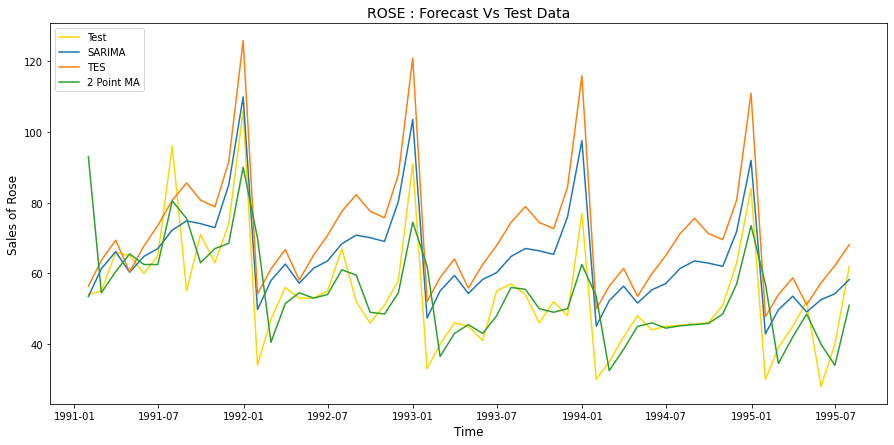

In [374]:
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#SES
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)

Building TES Model on Rose full data

In [375]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [376]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.404 and MAPE is 13.87


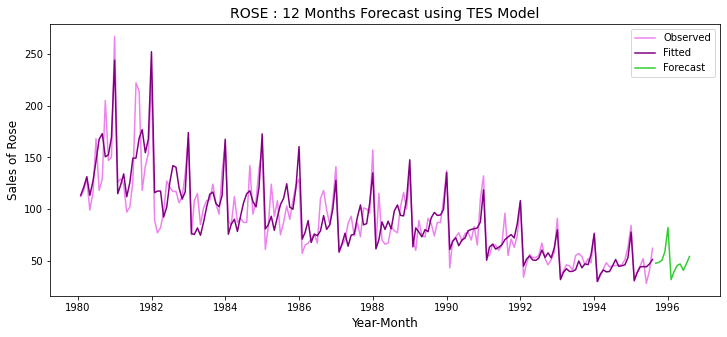

In [377]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

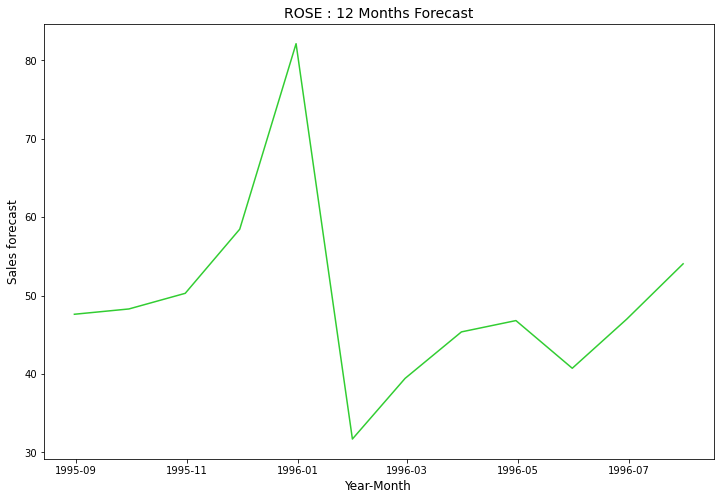

In [378]:
plt.figure(figsize=(12,8))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

Try SARIMAX

In [379]:
rose_log_trans = np.log10(df['Rose'])

In [380]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order= (4,1,1), 
                                seasonal_order= (0,1,1,12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Sun, 11 Dec 2022   AIC                           1342.270
Time:                                    19:49:30   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

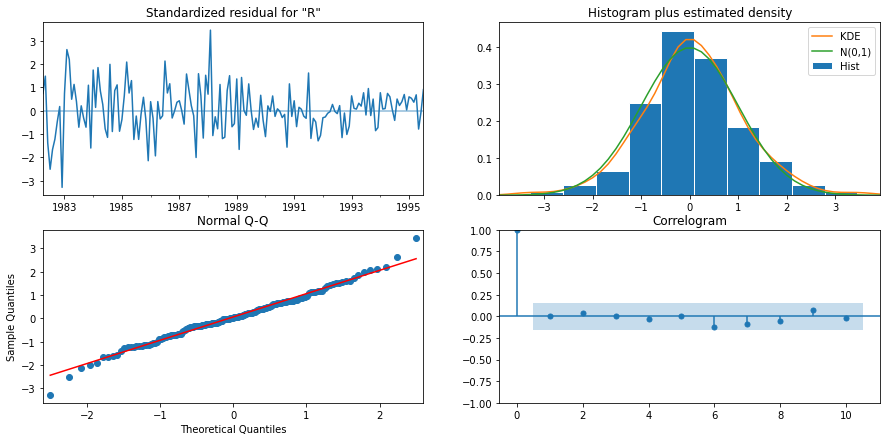

In [381]:
results_full_data_model_rose.plot_diagnostics();

In [382]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540808  15.245484      16.660210      76.421407
1995-09-30  45.514602  15.769105      14.607724      76.421480
1995-10-31  46.226234  15.827869      15.204181      77.248287
1995-11-30  54.319829  15.831173      23.291300      85.348358
1995-12-31  82.214864  15.835191      51.178460     113.251268

In [383]:
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)
print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [384]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))


In [385]:
results_full_data_model_rose.fittedvalues.head()


YearMonth
1980-01-31      0.000000
1980-02-29    115.410429
1980-03-31    114.398802
1980-04-30    123.947735
1980-05-31     92.219739
dtype: float64

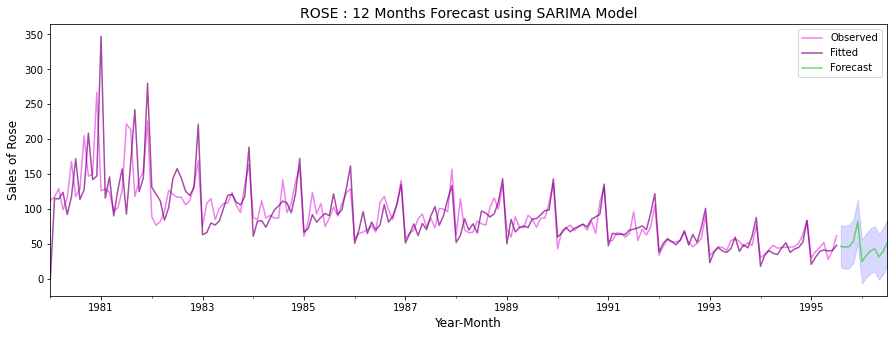

In [386]:
plt.figure(figsize=(15,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')
results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

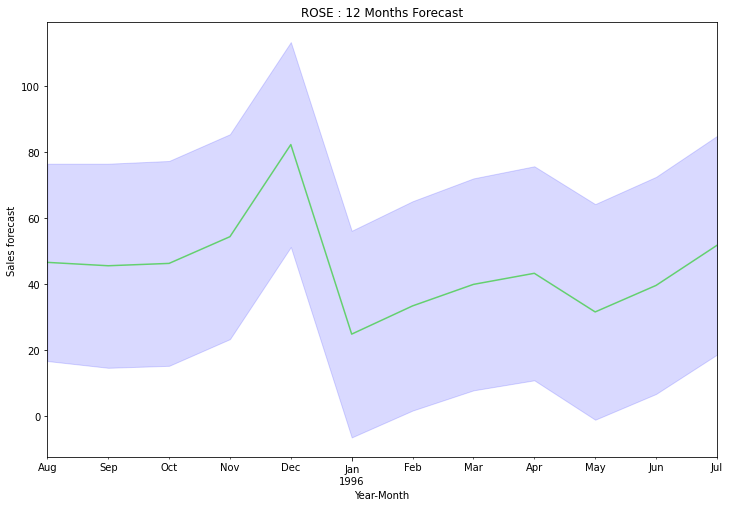

In [387]:
plt.figure(figsize=(12,8))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [388]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [389]:
forecast2.describe()


ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000

In [390]:
forecast2.sum()

ROSE    538.86
dtype: float64